# TODO

<p style="color:#FF0000">Turbine class methods:</p>
    <li>Assertions:
        <ul>
            <li>Radial constraint. The radius of the first turbine stage determines the rest of the stages.</li>
        </ul>
    </li>
    <li>
        Stator (guide-vane) modelling.
    </li>
</ul>

<a id=IMPORTING-PACKAGES></a>
# IMPORTING PACKAGES

In [1]:
import sys
sys.path.insert(0,'C:/Users/azarketa/Dropbox (MGEP)/INTERNAL/Code/Python/own_packages')

In [2]:
import numpy as np
import matplotlib as mpl
import scipy as sc
import matplotlib.pyplot as plt
import scipy.integrate as scint
import time
import os
from scipy.interpolate import interp1d
from scipy.interpolate import LSQUnivariateSpline as lsqus
from scipy.integrate import simpson
from operator import itemgetter
import openpyxl
import pickle
import copy
from functools import partial
import Math_Tools.MathTools as mt
from scipy.interpolate import interp1d
from typing import Union
import pygad
import multiprocessing as mp
import turbine_classes
from wakepy import set_keepawake, unset_keepawake

<a id=EXPERIMENTAL-NUMERICAL-DATA-LOADING></a>
# EXPERIMENTAL-NUMERICAL DATA-LOADING

<a id=POLAR-DATABASE></a>
## POLAR DATABASE FROM 'POLARS.XLSX' FILE

The following two code snippets are intended to show the difference between loading a database from an Excel file, and loading it directly from a serialized (previously pre-processed) database. In the latter case, the loading operation is much more efficient (i.e. less time-consuming), because the code does not require to open an Excel file, read each entry, dump it to a separate variable, and perform the extending/reversing polar operations. It just loads an object (a Pickle file), which is in binary format and has been stored when pre-processing the database on a first run.

The function argument that determines whether the pre-processing is performed or, instead, the serialized file is read, is the parameter 'pick' ([see documentation in the corresponding section](#POLAR-DATABASE-LOAD-FUNCTION)). By default, 'pick' is set equal to <code Python>False</code>, so the first code snippet performs the loading and pre-processing of the Excel file, whereas the second loads a serialized Pickle file instead. The difference in the computing times (400 ms vs 20 ms approximately) shows the importance of having a serialized object for these kind of operations.

In [3]:
# polars = polar_database_load()

In [4]:
polars = turbine_classes.polar_database_load(filepath=os.path.dirname("POLARS"), pick=True)

<a id=CIAPPI-DATA-LOADING></a>
## CIAPPI DATA-LOADING

<a id=THESIS-DATA></a>
### THESIS DATA

In [5]:
# phi-tau data from phi-tau diagram.
## BEM data.
Ciappiphitau, Ciappitau = np.loadtxt(open("CiappiData/2021Ciappi_torque_vs_phi.txt").readlines(), usecols=(0, 1), delimiter="\t", unpack=True)
## k-omega model data.
komegaphitau, komegatau = np.loadtxt(open("CiappiData/2021unsteadykomega_torque_vs_phi.txt").readlines(), usecols=(0, 1), delimiter="\t", unpack=True)
# phi-power data from phi-power diagram.
## BEM data.
Ciappiphipower, Ciappipower = np.loadtxt(open("CiappiData/2021Ciappi_power_vs_phi.txt").readlines(), usecols=(0, 1), delimiter="\t", unpack=True)
## k-omega model data.
komegaphipower, komegapower = np.loadtxt(open("CiappiData/2021unsteadykomega_power_vs_phi.txt").readlines(), usecols=(0, 1), delimiter="\t", unpack=True)
# flowrate-dp data from flowrate-dp diagram.
## BEM data.
Ciappiqdp_st_to_st, Ciappidp_st_to_st = np.loadtxt(open("CiappiData/2021Ciappi_deltap_vs_flowrate.txt"), usecols=(0, 1), delimiter="\t", unpack=True)
## k-omega model data.
komegaqdp_st_to_st, komegadp_st_to_st = np.loadtxt(open("CiappiData/2021unsteadykomega_deltap_vs_flowrate.txt"), usecols=(0, 1), delimiter="\t", unpack=True)
# phi-eff data from phi-eff diagram.
## BEM data.
Ciappiphieff, Ciappieff = np.loadtxt(open("CiappiData/2021Ciappi_eff_vs_phi.txt"), usecols=(0, 1), delimiter="\t", unpack=True)
## k-omega model data.
komegaphieff, komegaeff = np.loadtxt(open("CiappiData/2021unsteadykomega_eff_vs_phi.txt"), usecols=(0, 1), delimiter="\t", unpack=True)
# axialvel-tanvelvar data from axialvel-tanvelvar diagram.
## actuator disc model data.
CiappiAxialVeltanvelvar, Ciappitanvelvar = np.loadtxt(open("CiappiData/2021Ciappi_axialvel_vs_tanvelvar_ad.txt"), usecols=(0, 1), delimiter="\t", unpack=True)

<a id=CIAPPI-PROVIDED-DATA></a>
### CIAPPI-PROVIDED DATA

In [6]:
# All data columns are read.
CiappiAxialVel, Ciappiphi2, Ciappipres, Ciappidens, Ciappibeta, Ciappicl, Ciappicd, CiappiCIF, CiappicxCIF, CiappicthetaCIF, Ciappitau2, Ciappipower2 = np.loadtxt(open("CiappiData/CiappiDataAxialVel.txt").readlines(), usecols=np.arange(0, 12), skiprows=1, unpack=True)

<a id=STARZMANN-DATA-LOADING></a>
## STARZMANN DATA-LOADING

In [7]:
# psi-phi data from psi-phi diagram for turbine model A.
StarzmannpsiphiA, StarzmannphiA = np.loadtxt(open("StarzmannData/2012Starzmann_psi_vs_phi_turbA.txt").readlines(), usecols=(0, 1), delimiter="\t", unpack=True)
# psi-phi data from psi-phi diagram for turbine model B.
StarzmannpsiphiB, StarzmannphiB = np.loadtxt(open("StarzmannData/2012Starzmann_psi_vs_phi_turbB.txt").readlines(), usecols=(0, 1), delimiter="\t", unpack=True)
# psi-phi data from psi-phi diagram for turbine model C.
StarzmannpsiphiC, StarzmannphiC = np.loadtxt(open("StarzmannData/2012Starzmann_psi_vs_phi_turbC.txt").readlines(), usecols=(0, 1), delimiter="\t", unpack=True)
# psi-eta data from psi-eta diagram for turbine model A.
StarzmannpsietaA, StarzmannetaA = np.loadtxt(open("StarzmannData/2012Starzmann_psi_vs_eta_turbA.txt").readlines(), usecols=(0, 1), delimiter="\t", unpack=True)
# psi-eta data from psi-eta diagram for turbine model B.
StarzmannpsietaB, StarzmannetaB = np.loadtxt(open("StarzmannData/2012Starzmann_psi_vs_eta_turbB.txt").readlines(), usecols=(0, 1), delimiter="\t", unpack=True)
# psi-eta data from psi-eta diagram for turbine model C.
StarzmannpsietaC, StarzmannetaC = np.loadtxt(open("StarzmannData/2012Starzmann_psi_vs_eta_turbC.txt").readlines(), usecols=(0, 1), delimiter="\t", unpack=True)

<a id=SHOWING-TURBINE-CLASS-FUNCTIONALITY></a>
### SHOWING TURBINE CLASS FUNCTIONALITY
Showing functionality by adding and removing stages.

In [8]:
# Instantiating turbine.
t = turbine_classes.turbine()

# Creating an 'omega' list for different rotational speeds.
omegas = 1000*np.linspace(3, 4, 10)
# Loop for adding stages.
for e, omega in enumerate(omegas):
    # Adding the turbine stages in the last position for stages below the fourth one.
    if e < 4:
        pos = -1
    # Otherwise, the stages are added in the 'e-3' position, namely 1, 2, 3...
    else:
        pos = e - 3
    # Creating the turbine stage at the given position with the specified 'omega' value.
    t.create_or_add_stage(pos=pos, omega=omega)

print("Stages and their respective rotational speeds after addition.")
for e, _ in enumerate(t.stages):
    print("Stage #" + str(e + 1) + ": omega= ", 1e-3*_.omega*60/(2*np.pi))
    
print("--------------------")
# Removing stages.
for i in [3, 3, 3]:
    print("Removing stage #" + str(i) + ", with omega = ", 1e-3*t.stages[i - 1].omega*60/(2*np.pi))
    t.remove_stage(i)
    
print("--------------------")
print("Stages and their respective rotational speeds after removal.")
for e, _ in enumerate(t.stages):
    print("Stage #" + str(e + 1) + ": omega= ", 1e-3*_.omega*60/(2*np.pi))    

Stages and their respective rotational speeds after addition.
Stage #1: omega=  3.0
Stage #2: omega=  3.4444444444444446
Stage #3: omega=  3.555555555555555
Stage #4: omega=  3.6666666666666665
Stage #5: omega=  3.7777777777777786
Stage #6: omega=  3.888888888888889
Stage #7: omega=  4.0
Stage #8: omega=  3.1111111111111116
Stage #9: omega=  3.2222222222222223
Stage #10: omega=  3.3333333333333335
--------------------
Removing stage #3, with omega =  3.555555555555555
Removing stage #3, with omega =  3.6666666666666665
Removing stage #3, with omega =  3.7777777777777786
--------------------
Stages and their respective rotational speeds after removal.
Stage #1: omega=  3.0
Stage #2: omega=  3.4444444444444446
Stage #3: omega=  3.888888888888889
Stage #4: omega=  4.0
Stage #5: omega=  3.1111111111111116
Stage #6: omega=  3.2222222222222223
Stage #7: omega=  3.3333333333333335


<a id=CASE-STUDIES></a>
# CASE-STUDIES

<a id=COMPARISONS-CIAPPI-DATA></a>
## COMPARISON WITH CIAPPI DATA

<a id=COMPARISONS-CIAPPI-DATA-BEM-NO-AD></a>
### BEM MODEL WITH NO ACTUATOR-DISK

<a id=COMPARISONS-CIAPPI-DATA-BEM-NO-AD-DATASET1></a>
#### DATASET 1

Executing BEMs.

In [1]:
# Instantiating turbine.
t = turbine_classes.turbine()
# Adding turbine stage with 0 tip-percent (comparison with Ciappi).
t.create_or_add_stage(tip_percent=0)

# Getting input values from different diagrams obtained from Ciappi's Ph.D. thesis: phi-tau, phi-power, q-dp_st_to_st, phi-eff.
input_phi_list = [Ciappiphitau, Ciappiphipower, Ciappiqdp_st_to_st, Ciappiphieff]
# Setting a list of lists with each entry comprising two values: the sought input and output parameters. Thus, the entry ["phi", "tau"] means that the input parameter is a flow coefficient, and the output parameter, a torque.
output_params_list = [["phi", "tau"], ["phi", "power"], ["q", "dp_st_to_st"], ["phi", "eff"]]

# Instantiating 'output_lists' and 'Ciappi_output_lists' as list variables for storing the output datasets.
output_lists = list()
Ciappi_output_lists = list()

# For loop running over the datasets on the 'input_phi_list'.
for f, input_phi in enumerate(input_phi_list):
    # Setting the 'output_params' to the corresponding output parameters from 'output_params_list'.
    output_params = output_params_list[f]
    # Instantiating a list on the globals dictionary for each output param with its corresponding name.
    for out_param in output_params:
        globals()[out_param] = list()

    # For loop running over all the input parameter values and executing the BEM method.
    for e, __ in enumerate(input_phi):
        # Calling BEM method with no actuator disk.
        t.BEM(__, inpres = Ciappipres[e], polars=polars, inputparam=output_params[0])
        # For loop for retrieving the corresponding output paramter according to the 'output_params' list.
        for g, _ in enumerate(output_params):
            if hasattr(t.turbstage1.it, _):
                data = t.turbstage1.it.__getattribute__(_)
            else:                
                data = t.turbstage1.eout.__getattribute__(_)
                if _ == "eff":
                    data *= 100
            if type(data) == np.ndarray:
                globals()[_].append(data[len(data)//2])
            else:
                globals()[_].append(data)
    
    # Appending the calculated datasets to the output lists. They are retrieved from the global dictionary.
    output_lists.append(itemgetter(*output_params)(globals()))    
    Ciappi_output_lists.append(itemgetter(*["Ciappi" + ''.join(output_params) if e== 0 else "Ciappi" + _ for e, _ in enumerate(output_params)])(globals()))

NameError: name 'turbine_classes' is not defined

Plotting results.

In [ ]:
# Instantiating 'colors' variable for storing blue colors coming from the 'Blues' palette.
colors = mpl.cm.__getattribute__("Blues")(np.linspace(0.4, 1, 3))

# Setting a list of lists with the x-axis and y-axis labels for the figures.
labels = [["$\\phi \\ [-]$", "$\\int_{r_{hub}}^{r_{tip}}\\mathrm{d}\\tau_{i} \\ [W]$"],
          ["$\\phi \\ [-]$", "$\\int_{r_{hub}}^{r_{tip}}\\mathrm{d}P_{i} \\ [W]$"],
          ["$q \\ [m^{3}/s]$", "$\\Delta{p}_{static} \\ [Pa]$"],
          ["$\\phi \\ [-]$", "$\\eta \\ [\\%]$"]]

# Running over the output lists for plotting them sequentially.
for e, output_list in enumerate(output_lists):
    # Generating figure.
    plt.figure(figsize=(15, 10))
    
    #Plotting statements.
    plt.plot(output_lists[e][0], output_lists[e][1],
            marker="o",
            color = colors[0],
            label="BEM NO-AD MGEP")
    plt.plot(Ciappi_output_lists[e][0], Ciappi_output_lists[e][1],
            marker="s",
            color=colors[1],
            label="BEM NO-AD Ciappi")
    
    #####
    ##### Figure configuration statements.
    #####
    # X label.
    plt.xlabel(labels[e][0], fontsize=20)
    # Y label.
    plt.ylabel(labels[e][1], fontsize=20)
    # Legend.
    plt.legend(fontsize=20, frameon=False)
    # Conditional for setting specific limits in case the efficiency parameter is plotted.
    if "eta" in labels[e][1]:
        ylims = plt.gca().get_ylim()
        plt.ylim((-10, ylims[1]))
    # Grid.
    plt.grid()    

<a id=COMPARISONS-CIAPPI-DATA-BEM-NO-AD-DATASET2></a>
#### DATASET 2

Executing BEMs.

In [ ]:
# Instantiating turbine.
t = turbine_classes.turbine()
# Adding turbine stage with 0 tip-percent (comparison with Ciappi).
t.create_or_add_stage(tip_percent=0)

# Instantiating 'tau' variable as a list for storing the output torque values.
taus = list()

# For loop on the input axial velocities provided by Ciappi.
for e, _ in enumerate(CiappiAxialVel):
    # Calling the BEM method with no actuator disk, and input parameter set to axial velocity.
    t.BEM(_, inpres=Ciappipres[e], polars=polars, inputparam='vx')
    # Appending the output torque value to the 'taus' list.
    taus.append(t.turbstage1.eout.tau)

Plotting.

In [ ]:
# Instantiating 'colors' variable for storing blue colors coming from the 'Blues' palette.
colors = mpl.cm.__getattribute__("Blues")(np.linspace(0.4, 1, 3))

# Generating figure.
plt.figure(figsize=(15, 10))

# Plot statements.
plt.plot(CiappiAxialVel, taus, marker='o', color=colors[0], label='BEM NO-AD MGEP')
plt.plot(CiappiAxialVel, Ciappitau2, marker='o', color=colors[1], label='BEM NO-AD Ciappi')

#####
##### Figure configuration statements.
#####
# X label.
plt.xlabel('$v_{x} \\ [m/s]$', fontsize=20)
# Y label.
plt.ylabel('$\\tau \\ [N·m]$', fontsize=20)
# Legend.
plt.legend(fontsize=20, frameon=False)
# Grid.
plt.grid()

<a id=COMPARISONS-CIAPPI-DATA-BEM-AD></a>
### BEM MODEL WITH ACTUATOR-DISK

<a id=COMPARISONS-CIAPPI-DATA-BEM-AD-DATASET2-COMPARISON></a>
#### DATASET 2 COMPARISON BETWEEN 3DAD AND 3DNOAD

Executing BEMs.

In [ ]:
# Instantiating turbine.
turbNOAD = turbine_classes.turbine()
# Adding turbine stage with 0 tip-percent (comparison with Ciappi).
turbNOAD.create_or_add_stage(tip_percent=0)

# Instantiating turbine.
turbAD = turbine_classes.turbine()
# Adding turbine stage with 0 tip-percent (comparison with Ciappi).
turbAD.create_or_add_stage(tip_percent=0)

# Instantiating 'tausNOAD' and 'tausAD' variables as lists for storing the output torque values.
tausNOAD = list()
tausAD = list()
# Instantiating 'vthetaNOAD' and 'vthetaAD' variables as lists for storing the output absolute tangential velocities.
vthetaNOAD = list()
vthetaAD = list()

ETAAD = list()
PIAD = list()
PSIAD = list()
PHIAD = list()

# For loop on the input axial velocities provided by Ciappi.
for e, _ in enumerate(CiappiAxialVeltanvelvar):
    # Executing BEM without AD.
    turbNOAD.BEM(_, inpres=Ciappipres[e + 1], polars=polars, inputparam='vx', mode='3DNOAD')        
    # Executing BEM with AD.
    turbAD.BEM(_, inpres=Ciappipres[e + 1], polars=polars, inputparam='vx', mode='3DAD')    
    # Appending results to output lists.
    tausNOAD.append(turbNOAD.turbstage1.eout.tau)    
    tausAD.append(turbAD.turbstage1.eout.tau)    
    vthetaNOAD.append((turbNOAD.turbstage1.ot.vtheta[len(turbNOAD.turbstage1.ot.vtheta)//2]))
    vthetaAD.append((turbAD.turbstage1.ot.vtheta[len(turbAD.turbstage1.ot.vtheta)//2]))     

Plotting.

In [ ]:
# Instantiating 'colors' variable for storing blue colors coming from the 'Blues' palette.
colors = mpl.cm.__getattribute__("Blues")(np.linspace(0.4, 1, 3))

# Generating figure.
plt.figure(figsize=(15, 10))

# Plot statements.
plt.plot(CiappiAxialVeltanvelvar, tausNOAD, marker='o', color=colors[0], label="BEM NO-AD MGEP")
plt.plot(CiappiAxialVeltanvelvar, tausAD, marker='o', color=colors[1], label="BEM AD MGEP")

# Getting x- and y-limits.
xlims = plt.gca().get_xlim()
ylims = plt.gca().get_ylim()

# Plotting red-colored line upon the x-axis for distinguishing it clearly.
plt.plot([xlims[0], xlims[1]], [0, 0], color='r')

# Resetting axes limits for avoiding seeing the ends of the horizontal line.
plt.gca().set_xlim([xlims[0], xlims[1]])
plt.gca().set_ylim([ylims[0], ylims[1]])

#####
##### Figure configuration statements.
#####
# X label.
plt.xlabel('$v_{x} \\ [m/s]$', fontsize=20)
# Y label.
plt.ylabel('$\\tau \\ [N·m]$', fontsize=20)
# Legend.
plt.legend(fontsize=20, frameon=False)
# Grid
plt.grid()

In [ ]:
# Instantiating 'colors' variable for storing blue colors coming from the 'Blues' palette.
colors = mpl.cm.__getattribute__("Blues")(np.linspace(0.4, 1, 3))

# Generating figure.
plt.figure(figsize=(15, 10))

# Plot statements.
plt.plot(CiappiAxialVeltanvelvar, vthetaNOAD, marker='o', color=colors[0], label='BEM NO-AD MGEP')
plt.plot(CiappiAxialVeltanvelvar, vthetaAD, marker='o', color=colors[1], label='BEM AD MGEP')
plt.plot(CiappiAxialVeltanvelvar, Ciappitanvelvar, marker='o', color=colors[2], label='BEM AD Ciappi')

#####
##### Figure configuration statements.
#####
# X label.
plt.xlabel('$v_{x} \\ [m/s]$', fontsize=20)
# Y label.
plt.ylabel('$v_{2\\theta} \\ [m/s]$', fontsize=20)
# Legend.
plt.legend(fontsize=20, frameon=False)
# Grid
plt.grid()

<a id=STOCHASTIC-ANALYSIS></a>
#### STOCHASTIC ANALYSIS

Executing BEMs and stochastic analysis function.

In [ ]:
# Instantiating turbine.
t = turbine_classes.turbine()
# Adding turbine stage with 0 tip-percent (comparison with Ciappi).
t.create_or_add_stage()

# Executing BEM with AD.
t.BEM(np.arange(3, 30), polars=polars, inputparam='vx', mode='3DAD')
# Executing stochastic analysis function.
stoch = turbine_classes.stochastic_analysis(t.Phi, t.Psi, t.Pi)

# Instantiating stochastic-analysis-derived parameters.
devs, Phistoch, Pistoch, Effstoch = stoch[0], stoch[1], stoch[2], stoch[3]

Plotting.

In [ ]:
# Instantiating 'colors' variable for storing blue colors coming from the 'Blues' palette.
colors = mpl.cm.__getattribute__("Blues")(np.linspace(0.4, 1, 3))

# Setting a list of lists with the x-axis and y-axis labels for the figures.
labels = [["$\\sigma_\\Psi \\ [-]$", "$\\Phi \\ [-]$"],
          ["$\\sigma_\\Psi \\ [-]$", "$\\Pi \\ [-]$"],
          ["$\\sigma_\\Psi \\ [-]$", "$\\eta \\ [-]$"]]

for e, stochvar in enumerate([Phistoch, Pistoch, Effstoch]):
    # Generating figure.
    plt.figure(figsize=(15, 10))
    # Plot statement.
    plt.plot(devs, stochvar)
    #####
    ##### Figure configuration statements.
    #####
    # X label.
    plt.xlabel(labels[e][0], fontsize=20)
    # Y label.
    plt.ylabel(labels[e][1], fontsize=20)
    # Grid.
    plt.grid()

<a id=SIM-DATA-LOADING></a>
### SIMULATION DATA LOADING

Loading data.

In [ ]:
sim_camp = ["flu_v-wise"]
model_camp = ["ciappi_model"]
v_camp = ["v" + str(_) for _ in np.arange(1, 14)]


for sim in sim_camp:
    for model in model_camp:
        for v in v_camp:
            listdir = [_ for _ in os.listdir("/".join([sim, model, v])) if ".txt" in _]
            for d in listdir:
                name = d
                data = list()
                if "velocity" in name:
                    name = name.split("_")[0].replace("-", "_")
                    lines = open("/".join([sim, model, v, d])).readlines()
                    for line in lines:
                        if "leading-edge" in line:
                            data.append(float(line.split(" ")[-1]))
#                 elif ".out" in name:
#                     name = name.split(".")[0]
#                     time_steps = np.loadtxt(open("/".join([sim, model, v, d])).readlines(), skiprows=3, usecols=(65), unpack=True, delimiter=" ")
#                     par = np.loadtxt(open("/".join([sim, model, v, d])).readlines(), skiprows=3, usecols=tuple(np.arange(1, 65)), unpack=True, delimiter=" ")
#                     indpar = list()
#                     for e, p in enumerate(par):
#                         parder = mt.derivative(y=par[e], h=time_steps[1]-time_steps[0])
#                         indpar.append([np.abs(_) < 1e-2 for _ in parder].index(True))
#                     maxindpar = max(indpar)
#                     data = list()
#                     for e, p in enumerate(par):
#                         data.append(np.average(par[e][maxindpar:]))
                elif "dx" in name or "dtheta" in name:
                    if "dx" in name:
                        name = "dx"
                    else:
                        name = "dtheta"
                    lines = open("/".join([sim, model, v, d])).readlines()
                    lines = lines[["-----" in _ for _ in lines].index(True) + 6:-2]
                    sec_data = list()
                    for line in lines:
                        split_line = '\t'.join(line.split()).split("\t")                        
                        sec_data.append((int(split_line[0].split("rad")[-1]), float(split_line[3])))
                    sec_data = sorted(sec_data, key=lambda x: x[0])
                    data = [_[1] for _ in sec_data]                    
                elif "pressure" in name:
                    name = "_".join(name.split("_")[:2]) + "_" + name.split("_")[-1].replace("-", "_").replace(".txt", "")
                    lines = open("/".join([sim, model, v, d])).readlines()
                    for line in lines:
                        if "rad" in line:
                            split_line = '\t'.join(line.split()).split(" ")[0]
                            data.append(float(split_line.split("\t")[-1]))
                    data[43] = 0.5*(data[42] + data[44])
                else:
                    if "density" in name:
                        name = "density"
                        lines = open("/".join([sim, model, v, d])).readlines()
                        for line in lines:
                            if "leading-edge" in line:
                                data.append(float(line.split(" ")[-1]))
                    elif "coordinates" in name:
                        name = "coordinates"
                        lines = open("/".join([sim, model, v, d])).readlines()
                        for line in lines:
                            if "airfoil" in line:
                                data.append(float(line.split(" ")[-1]))
                    elif "area" in name:
                        name = "areas"
                        lines = open("/".join([sim, model, v, d])).readlines()
                        for line in lines:
                            if "airfoil" in line:
                                data.append(float(line.split(" ")[-1]))                            
                name = "_".join([model, v, name])
                globals()[name] = np.array(data)

Computing lift and drag coefficients.

In [ ]:
# Instantiating turbine.
t = turbine()
# Adding turbine stage with 0 tip-percent (comparison with Ciappi).
t.create_or_add_stage(N=63, tip_percent=1.5)

xs = list()
xs_sim = list()
thetas = list()
thetas_sim = list()

for v in v_camp:
    t.BEM([int(v.split("v")[-1])], polars=polars, inputparam='vx', mode='3DAD')
    xs.append(t.turbstage1.coefs.dx)    
    for model in model_camp:
        xs_sim.append(globals()["_".join([model, v, "dx"])])
        thetas_sim.append(globals()["_".join([model, v, "dtheta"])])

In [ ]:
r = t.turbstage1.gp.r*1000
r_sim = globals()["ciappi_model_v1_coordinates"]

for v in np.arange(1, 14):
    t.BEM([v], polars=polars, inputparam='vx', mode='3DAD')
    p_an = t.turbstage1.eout.dp_st_to_st
    plt.figure()
    pres_sec = ["m100", "m90", "m80", "m70", "m60", "m50", "m40", "m30", "m20", "m10"]
    colors = mpl.cm.Blues(np.linspace(0.5, 1, len(pres_sec)))
#     for e, pres in enumerate(pres_sec):
#         p_sim = globals()["ciappi_model_v" + str(v) + "_static_pressure_z_" + pres]
#         plt.plot(r_sim, p_sim, color=colors[e])
#     pres_sec = ["10", "20", "30", "40", "50", "60", "70", "80", "90", "100"]
#     colors = mpl.cm.Reds(np.linspace(0.5, 1, len(pres_sec)))
#     for e, pres in enumerate(pres_sec):
#         p_sim = globals()["ciappi_model_v" + str(v) + "_static_pressure_z_" + pres]
#         plt.plot(r_sim, p_sim, color=colors[e])
    pres_sec = ["100"]
    for e, pres in enumerate(pres_sec):
        p_sim = globals()["ciappi_model_v" + str(v) + "_static_pressure_z_" + pres]# - globals()["ciappi_model_v" + str(v) + "_static_pressure_z_" + "m" + pres]
        plt.plot(r_sim, p_sim, color=colors[e])
    plt.plot(r_sim, p_an, 'k')

### EXP-NUM COMPARISON

In [ ]:
dls = list()
dls_sim = list()
dds = list()
dds_sim = list()

# Instantiating turbine.
t = turbine()
# Adding turbine stage with 0 tip-percent (comparison with Ciappi).
t.create_or_add_stage(N=64, tip_percent=1.5)

for v in range(1, 24):
    t.BEM([v], polars=polars, inputparam='vx', mode='3DNOAD')
    dls.append(t.turbstage1.coefs.dl)
    dls_sim.append(globals()["ciappi_model_v" + str(v) + "_dx"][:-1])
    dds.append(t.turbstage1.coefs.ddtc)
    dds_sim.append(globals()["ciappi_model_v" + str(v) + "_dtheta"][:-1])
    
r = t.turbstage1.gp.r*1000
r_sim = globals()["ciappi_model_v1_coordinates"]

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 20))

for e, _ in enumerate(dls):
    ax[0].plot(r, dls[e], color='b', alpha=0.1*(1 + 0.5*e))
    ax[0].plot(r_sim[:-1], dls_sim[e], color='r', alpha=0.1*(1 + 0.5*e))
    ax[1].plot(r, dds[e], color='b', alpha=0.1*(1 + 0.5*e))
    ax[1].plot(r_sim[:-1], dds_sim[e], color='r', alpha=0.1*(1 + 0.5*e))

<a id=DOUBLE-STAGE-AND-COUNTERROTATING-TURBINES></a>
## DOUBLE-STAGE AND COUNTERROTATING TURBINES

Executing BEMs.

In [ ]:
# Biplane turbine instantiation.
tdouble = turbine_classes.turbine()
# Adding first stage.
tdouble.create_or_add_stage()
# Adding second stage.
tdouble.create_or_add_stage()

# Biplane, counter-rotating turbine instantiation.
tcounter = turbine_classes.turbine()
# Adding first stage.
tcounter.create_or_add_stage()
# Adding second counter-rotating stage.
tcounter.create_or_add_stage(omega=-3600)

# Executing BEMs.
tdouble.BEM(phi_q_vs=CiappiAxialVel, polars=polars)
tcounter.BEM(phi_q_vs=CiappiAxialVel, polars=polars)

Plotting.

In [ ]:
# Instantiating 'colors' variable for storing blue colors coming from the 'Blues' palette.
colors = mpl.cm.__getattribute__("Blues")(np.linspace(0.2, 1, 5))

# Generating figure.
plt.figure(figsize=(15, 10))

# Plot statements.
plt.plot(CiappiAxialVel, tdouble.torque_stages[0], marker='o', color=colors[0], label="First stage")
plt.plot(CiappiAxialVel, tdouble.torque_stages[1], marker='o', color=colors[1], label="Second stage")
plt.plot(CiappiAxialVel, tcounter.torque_stages[1], marker='o', color=colors[2], label="Second counter stage")
plt.plot(CiappiAxialVel, tdouble.torque, marker='o', color=colors[3], label="Biplane turbine")
plt.plot(CiappiAxialVel, tcounter.torque, marker='o', color=colors[4], label="Counter biplane turbine")

#####
##### Figure configuration statements.
#####
# X label.
plt.xlabel('$v_{x} \\ [m/s]$', fontsize=20)
# Y label.
plt.ylabel('$\\tau \\ [N·m]$', fontsize=20)
# Legend.
plt.legend(fontsize=20, frameon=False)
# Grid
plt.grid()
plt.savefig('tau-comp-biplane-counter.png')

# Generating figure.
plt.figure(figsize=(15, 10))

# Plot statements.
plt.plot(CiappiAxialVel, tdouble.Eff_stages[0], marker='o', color=colors[0], label="First stage")
plt.plot(CiappiAxialVel, tdouble.Eff_stages[1], marker='o', color=colors[1], label="Second stage")
plt.plot(CiappiAxialVel, tcounter.Eff_stages[1], marker='o', color=colors[2], label="Second counter stage")
plt.plot(CiappiAxialVel, tdouble.Eff, marker='o', color=colors[3], label="Biplane turbine")
plt.plot(CiappiAxialVel, tcounter.Eff, marker='o', color=colors[4], label="Counter biplane turbine")

#####
##### Figure configuration statements.
#####
# X label.
plt.xlabel('$v_{x} \\ [m/s]$', fontsize=20)
# Y label.
plt.ylabel('$\\eta \\ [-]$', fontsize=20)
# Legend.
plt.legend(fontsize=20, frameon=False)
# Grid
plt.grid()
plt.savefig('eff-comp-biplane-counter.png')

<a id=CASES-STARZMANN-DATA></a>
## STARZMANN DATA

<a id=ROTOR-A-DATASET></a>
### ROTOR A DATASET

Executing BEMs and stochastic analysis.

In [ ]:
#####
##### General turbine and turbine-stage parameters.
#####
# Omega
omega = 4000
# Number of discretisation points.
N = 50
# Evenly-varying chordwise discretisation.
c = np.linspace(0.0702, 0.1634, N + 1)
# Casing radius.
rcas = 0.2
# Hub-to-tip ratio.
hub_to_tip_ratio = 0.086/0.2
# Tip-percentage.
tip_percent = 0
# Number of blades.
Z = 5

# Instantiating turbine with single stage and constant chord equal to the minimum chord.
turbminchord = turbine_classes.turbine()
turbminchord.create_or_add_stage(omega=omega,
                     N=N,
                     chord=c[0],
                     rcas=rcas,
                     hub_to_tip_ratio=hub_to_tip_ratio,
                     tip_percent=tip_percent,
                     Z=Z)

# Instantiating turbine with single stage and constant chord equal to a close-to-unit solidity at tip.
turbmaxchord = turbine_classes.turbine()
turbmaxchord.create_or_add_stage(omega=omega,
                     N=N,
                     chord=0.85*2*np.pi*turbminchord.turbstage1.gp.r[0]/turbminchord.turbstage1.gp.Z,
                     rcas=rcas,
                     hub_to_tip_ratio=hub_to_tip_ratio,
                     tip_percent=tip_percent,
                     Z=Z)

# Instantiating turbine with single stage and variable chord.
turbvarchord = turbine_classes.turbine()
turbvarchord.create_or_add_stage(omega=omega,
                     N=N,
                     chord=c,
                     rcas=rcas,
                     hub_to_tip_ratio=hub_to_tip_ratio,
                     tip_percent=tip_percent,
                     Z=Z)

# Instantiating turbine with two equal stages with variable chords.
turbdouble = copy.deepcopy(turbvarchord)
turbdouble.create_or_add_stage(omega=omega,
                     N=N,
                     chord=c,
                     rcas=rcas,
                     hub_to_tip_ratio=hub_to_tip_ratio,
                     tip_percent=tip_percent,
                     Z=Z)

# Instantiating turbine with two equal, counter-rotating stages.
turbcounter = copy.deepcopy(turbvarchord)
turbcounter.create_or_add_stage(omega=-omega,
                     N=N,
                     chord=c,
                     rcas=rcas,
                     hub_to_tip_ratio=hub_to_tip_ratio,
                     tip_percent=tip_percent,
                     Z=Z)

# Executing BEMs and stochastic analysis for each turbine.
for turb in ["turbminchord", "turbmaxchord", "turbvarchord", "turbdouble", "turbcounter"]:
    globals()[turb].BEM(np.arange(1, 30), polars=polars, inputparam='vx', mode='3DAD')
    globals()[turb + "stoch"] = turbine_classes.stochastic_analysis(globals()[turb].Phi, globals()[turb].Psi, globals()[turb].Pi)

Plotting.

In [ ]:
# Instantiating 'blues' and 'greens' palettes.
blues = list(mpl.cm.__getattribute__("Blues")(np.linspace(0.4, 1, 3)))
greens = list(mpl.cm.__getattribute__("Greens")(np.linspace(0.4, 1, 2)))
colors = blues + greens
# Instantiating 'markers' variable.
markers = ['o', '^', 's', 'X', '>']
# Instantiating 'handles' variable.
handles = [mpl.lines.Line2D([0], [0], color=colors[0], marker=markers[0], markersize=10, label="Single-stage, low chord"),
           mpl.lines.Line2D([0], [0], color=colors[1], marker=markers[1], markersize=10, label="Single-stage, high chord"),
           mpl.lines.Line2D([0], [0], color=colors[2], marker=markers[2], markersize=10, label="Single-stage, varying chord"),
           mpl.lines.Line2D([0], [0], color=colors[3], marker=markers[3], markersize=10, label="Double-stage"),
           mpl.lines.Line2D([0], [0], color=colors[4], marker=markers[4], markersize=10, label="Double-stage, counter-rotating")]

#####
##### DIMENSIONLESS, NON-STOCHASTIC PLOTS
#####
# Instantiating figure for plotting Psi-Phi functional relations.
plt.figure(figsize=(15, 10))
# Plotting loop.
for i, turb in enumerate(["turbminchord", "turbmaxchord", "turbvarchord", "turbdouble", "turbcounter"]):
    var0 = globals()[turb].Psi
    var1 = globals()[turb].Phi
    plt.plot(var0, var1, color=colors[i], marker=markers[i], markersize=10)
# Setting plot configuration.
plt.legend(handles=handles, frameon=False, fontsize=15)
plt.grid()
plt.title("Non-stochastic, $\\Psi-\\Phi$ relation", fontsize=20)
plt.xlabel("$\\Psi \\ [-]$", fontsize=20)
plt.ylabel("$\\Phi \\ [-]$", fontsize=20)

# Instantiating figure for plotting Psi-Pi functional relations.
plt.figure(figsize=(15, 10))
# Plotting loop.
for i, turb in enumerate(["turbminchord", "turbmaxchord", "turbvarchord", "turbdouble", "turbcounter"]):
    var0 = globals()[turb].Psi
    var1 = globals()[turb].Pi
    plt.plot(var0, var1, color=colors[i], marker=markers[i], markersize=10)
# Setting plot configuration.
plt.legend(handles=handles, frameon=False, fontsize=15)
plt.grid()
plt.title("Non-stochastic, $\\Psi-\\Pi$ relation", fontsize=20)
plt.xlabel("$\\Psi \\ [-]$", fontsize=20)
plt.ylabel("$\\Pi \\ [-]$", fontsize=20)

# Instantiating figure for plotting Psi-Eff functional relations.
plt.figure(figsize=(15, 10))
# Plotting loop.
for i, turb in enumerate(["turbminchord", "turbmaxchord", "turbvarchord", "turbdouble", "turbcounter"]):
    var0 = globals()[turb].Psi
    var1 = globals()[turb].Eff
    plt.plot(var0, var1, color=colors[i], marker=markers[i], markersize=10)
# Setting plot configuration.
plt.legend(handles=handles, frameon=False, fontsize=15)
plt.grid()
plt.title("Non-stochastic, $\\Psi-\\eta$ relation", fontsize=20)
plt.xlabel("$\\Psi \\ [-]$", fontsize=20)
plt.ylabel("$\\eta \\ [-]$", fontsize=20)

#####
##### DIMENSIONLESS, STOCHASTIC PLOTS
#####
# Instantiating figure for plotting dev-Phi functional relations.
plt.figure(figsize=(15, 10))
# Plotting loop.
for i, turb in enumerate(["turbminchord", "turbmaxchord", "turbvarchord", "turbdouble", "turbcounter"]):
    var0 = globals()[turb + "stoch"][0]
    var1 = globals()[turb + "stoch"][1]
    plt.plot(var0, var1, color=colors[i])
    plt.plot(var0[::len(var0)//10], var1[::len(var1)//10], color=colors[i],
             marker=markers[i], markersize=10, linestyle='')
# Setting plot configuration.    
plt.legend(handles=handles, frameon=False, fontsize=15)
plt.grid()
plt.title("Stochastic, $\\sigma_\\Psi-\\bar\\Phi$ relation", fontsize=20)
plt.xlabel("$\\sigma_\\Psi \\ [-]$", fontsize=20)
plt.ylabel("$\\bar\\Phi \\ [-]$", fontsize=20)

# Instantiating figure for plotting dev-Pi functional relations.
plt.figure(figsize=(15, 10))
# Plotting loop.
for i, turb in enumerate(["turbminchord", "turbmaxchord", "turbvarchord", "turbdouble", "turbcounter"]):
    var0 = globals()[turb + "stoch"][0]
    var1 = globals()[turb + "stoch"][2]
    plt.plot(var0, var1, color=colors[i])
    plt.plot(var0[::len(var0)//10], var1[::len(var1)//10], color=colors[i],
             marker=markers[i], markersize=10,  linestyle='')
# Setting plot configuration.    
plt.legend(handles=handles, frameon=False, fontsize=15)
plt.grid()
plt.title("Stochastic, $\\sigma_\\Psi-\\bar\\Pi$ relation", fontsize=20)
plt.xlabel("$\\sigma_\\Psi \\ [-]$", fontsize=20)
plt.ylabel("$\\bar\\Pi \\ [-]$", fontsize=20)

# Instantiating figure for plotting dev-Eff functional relations.
plt.figure(figsize=(15, 10))
# Plotting loop.
for i, turb in enumerate(["turbminchord", "turbmaxchord", "turbvarchord", "turbdouble", "turbcounter"]):
    var0 = globals()[turb + "stoch"][0]
    var1 = globals()[turb + "stoch"][3]
    plt.plot(var0, var1, color=colors[i])
    plt.plot(var0[::len(var0)//10], var1[::len(var1)//10], color=colors[i],
             marker=markers[i], markersize=10, linestyle='')
# Setting plot configuration.    
plt.legend(handles=handles, frameon=False, fontsize=15)
plt.grid()
plt.title("Stochastic, $\\sigma_\\Psi-\\bar\\eta$ relation", fontsize=20)
plt.xlabel("$\\sigma_\\Psi \\ [-]$", fontsize=20)
plt.ylabel("$\\bar\\eta \\ [-]$", fontsize=20)

# Show statement.
plt.show()

<a id=VARYING-PITCH-DATASET></a>
### VARYING-PITCH DATASET

<a id=POWER-BASED-PITCH-OPTIMIZATION></a>
#### POWER-BASED PITCH OPTIMIZATION

Executing BEMs.

In [ ]:
#####
##### DEFINING CONSTANT ARGUMENTS
#####
N = 50
omega = 2100
# omega = 4000
rcas = 0.5
# rcas = 0.2
airfoils = ["NACA0015", "NACA0018", "NACA0021"]
polars = polars
cpobjs = [691.53, 1428.58, 1074.59, 674.72, 908.85, 1152.78, 633.19, 763.21, 1075.16, 823.22]
# cpobj = 2000
devobjs = [1850.6, 3243.1, 2912.14, 2241.16, 2408.96, 4814, 3318.31, 3431.9, 6265.85, 6612.67]
# devobj = 0.1
weights = [0.11, 0.12, 0.12, 0.09, 0.08, 0.15, 0.09, 0.09, 0.10, 0.07]
Nmin = 1000
Nmax = 3200

constargs = {"N": N,
             "omega": omega,
             "rcas": rcas,
             "airfoils": airfoils,
             "polars": polars,
             "cpobjs": cpobjs,
             "devobjs": devobjs,
             "weights": weights,
             "Nmin": Nmin,
             "Nmax": Nmax,
             "Mode": "mono"}

turb = turbine_classes.instantiate_turbine(constargs=constargs, solution=[3, 0.7, 0.486, 0.75, 1, 2, 1, 1])

turb.turbstage1.gp.chord

In [ ]:
# Instantiating 'colors' variable for storing blue colors coming from the 'Blues' palette.
colors = mpl.cm.__getattribute__("Blues")(np.linspace(0.2, 1, len(range(0, 15)) + 1))
        
#####
##### General turbine and turbine-stage parameters.
#####

omegas = [3000*(1 + e) for e in range(1)]

optpitches = list()

plt.figure(figsize=(15, 10))

for e, omega in enumerate(omegas):
    # Instantiating figure.
    # plt.figure(figsize=(15, 10))   
    # Number of discretisation points.
    N = 50
    # Evenly-varying chordwise discretisation.
    c = np.linspace(0.54977871, 0.50893801, N + 1)
    # Casing radius.
    rcas = 0.5
    # Hub-to-tip ratio.
    hub_to_tip_ratio = 0.75
    # Tip-percentage.
    tip_percent = 100*2e-3/0.50893801
    # Number of blades.
    Z = 3

    for angpitch in range(-15, 1):
        # Instantiating turbine with single stage and constant chord equal to the minimum chord.
        globals()["turb" + str(omega) + "_" + str(angpitch).replace("-", "m")] = turbine_classes.turbine()
        globals()["turb" + str(omega) + "_" + str(angpitch).replace("-", "m")].create_or_add_stage(omega=omega,
                                                                 N=N,
                                                                 chord=c,
                                                                 rcas=rcas,
                                                                 hub_to_tip_ratio=hub_to_tip_ratio,
                                                                 tip_percent=tip_percent,
                                                                 angpitch=angpitch,
                                                                 Z=Z)
        
    clstatesdict = dict()
    vxlist = list(range(1, 31))
    # Executing BEMs and stochastic analysis for each turbine.
    for angpitch in range(-15, 1):
        clstates = dict()
        for i in vxlist:
            globals()["turb" + str(omega) + "_" + str(angpitch).replace("-", "m")].BEM([i], polars=polars, inputparam='vx', mode='3DAD', reset=False)
            above_max_count = globals()["turb" + str(omega) + "_" +  str(angpitch).replace("-", "m")].turbstage1.coefs.clstate.count("above_max")
            state_count = len(globals()["turb" + str(omega) + "_" + str(angpitch).replace("-", "m")].turbstage1.coefs.clstate)
            if above_max_count > 1:
                clstates[i] =  "above_max"
            else:
                clstates[i] =  "below_max"
        clstatesdict[angpitch] = clstates
        
    # Instantiating lists for storing powers, phis and angular pitchs.
    powers = list()
    effs = list()
    phis = list()
    psis = list()
    pis = list()
    effs = list()
    angpitch = list()

    #####
    ##### POWER-BASED OPTIMIZATION
    #####
    # Loop running over the calculated datasets, storing them in the lists and plotting the curves.
    for _ in range(-15, 1):
        # Storing angular pitch.
        angpitch.append(_)
        # Getting power for each instantiated turbine.
        power = globals()["turb" + str(omega) + "_" + str(_).replace("-", "m")].power
        # Appending power to 'powers'.
        powers.append(power)
        # Getting dimensionless input flow-rate for each instantiated turbine.
        phi = globals()["turb" + str(omega) + "_" + str(_).replace("-", "m")].Phi
        # Appending dimensionless flow-rate to 'phis'.
        phis.append(phi)
        # Getting dimensionless output pressure-loss for each instantiated turbine.
        psi = globals()["turb" + str(omega) + "_" + str(_).replace("-", "m")].Psi
        # Appending dimensionless pressure-loss to 'psis'.
        psis.append(psi)    
        # Getting dimensionless output powers for each instantiated turbine.
        pi = globals()["turb" + str(omega) + "_" + str(_).replace("-", "m")].Pi
        # Appending dimensionless power to 'pis'.
        pis.append(pi)
        # Getting efficiency for each instantiated turbine.
        eff = globals()["turb" + str(omega) + "_" + str(_).replace("-", "m")].Eff
        # Appending efficiency to 'effs'.
        effs.append(eff)
        # Plotting the phi-power curves for each of the instantiated turbine.
        # plt.plot(phi, power, color=colors[np.abs(_)])

    # The 'opt-' variables represent lists for storing the optimum powers, pitches and dimensionless variables.
    optpowers = list()
    optangpitchspow = list()
    optpsispow = list()
    optpispow = list()
    opteffspow = list()

    # Loop for searching the optimum power and its corresponding angular pitch.
    for e, _ in enumerate(phi):
        # Storing the dimensionless variables corresponding to each instantiated turbine with different angular pitches for the considered input variable.
        psipowers = [__[e] for __ in psis]
        pipowers = [__[e] for __ in pis]
        effpowers = [__[e] for __ in effs]
        phipowers = [__[e] for __ in powers]

        # 'clstateat0' gets the lift-coefficient-based state of the blades for the 0-angular-pitch case at the considered input variable.
        clstatesat0 = clstatesdict[0][vxlist[e]]
        # The power-based optimization is performed in case the lift-coefficient-based state coincides with 'above_max', meaning that the imposed pitch aims at delaying stall.
        # In case 'clstatesat0' is 'below_max', then no optimization is performed, and the output variables correspond to those obtained at a 0-angular-pitch.
        if clstatesat0 == "below_max":
            # Setting the optimum power to that of the 0-angular-pitch.
            optpower = [__[e] for __ in powers][angpitch.index(0)]
            # Setting the 'ind_optpower' index to the index that corresponds to 'optpower', which served for retrieving the rest of dimensionless values.
            ind_optpower = phipowers.index(optpower)
            # The optimum angular pitch is set to 0.
            optangpitch = 0
        # In case 'clstatesat0' is 'above_max', then a power-based optimization is performed.
        else:
            # The 'optpower' is set to the maximum value of the 'powers' array.
            optpower = max([__[e] for __ in powers])
            # The index at which such an optimum power occurs is obtained.
            ind_optpower = phipowers.index(optpower)
            # The optimum angular pitch is retrieved by means of such an index.
            optangpitch = angpitch[ind_optpower]
            if np.sign(optangpitch) == np.sign(_):
                # Setting the optimum power to that of the 0-angular-pitch.
                optpower = [__[e] for __ in powers][angpitch.index(0)]
                # Setting the 'ind_optpower' index to the index that corresponds to 'optpower', which served for retrieving the rest of dimensionless values.
                ind_optpower = phipowers.index(optpower)
                # The optimum angular pitch is set to 0.
                optangpitch = 0            


        # The optimum dimensionless variables are retrieved based on the 'ind_optpower' index.
        # Optimum dimensionless pressure-loss retrieval.
        optpsipow = psipowers[ind_optpower]
        # Optimum dimensionless power retrieval.
        optpipow = pipowers[ind_optpower]
        # Optimum efficiency retrieval.
        opteffpow = effpowers[ind_optpower]

        # The retrieved optimum values are appended to the corresponding lists.
        optpowers.append(optpower)
        optangpitchspow.append(optangpitch)        
        optpsispow.append(optpsipow)
        optpispow.append(optpipow)
        opteffspow.append(opteffpow)     

    #####
    ##### PLOTTING STATEMENTS
    #####
    # Plotting the optimum power curve.
    plt.plot(phi, [_/1000 for _ in optpowers], linewidth=2, label=omega)
    # Plot configuration statements.
    plt.xlabel('$\\phi \\ [-]$', fontsize=20)
    plt.ylabel('pow [kW]', fontsize=20)
    plt.legend(fontsize=20, frameon=False, loc=2)
    plt.grid()
    # Twinning the x-axis for plotting optimum angular pitches.
    # plt.twinx()
    # Plotting the optimum angular pitches.
    # plt.plot(phi, optangpitchspow, marker='o', color='r', markersize=10, linestyle='', label='power-optimized pitch')
    # Plot configuration statements.
    # plt.ylabel('$\\delta \\ [\\circ]$', fontsize=20)
    # plt.legend(fontsize=20, frameon=False)
    # plt.grid(axis='y', color='r', alpha=0.5)

#         # Getting index for separating the plotting of positive- and negative-valued inlet velocities.
#         ind = vxlist.index(1)

#         # Instantiating a subplot figure.
#         fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
#         # Plotting the psi-phi functional relations for negative-valued inlet velocities.
#         # Optimum relation.
#         ax[0].plot(optpsispow[:ind], phi[:ind], linestyle='', marker='^', color='r', label='Optimized')
#         # Non-optimum relation.
#         ax[0].plot(turb0.Psi[:ind], turb0.Phi[:ind], color='k', label='Non-optimized')
#         # Inverting x- and y-axes for easing visualization.
#         ax[0].invert_xaxis()
#         ax[0].invert_yaxis()
#         # Setting subplot configuration.
#         ax[0].set_title('$\\psi-\\phi$ relation for $v_{x}<0$', fontsize=20)
#         ax[0].set_xlabel('$\\psi \\ [-]$', fontsize=20)
#         ax[0].set_ylabel('$\\phi \\ [-]$', fontsize=20)
#         ax[0].legend(frameon=False, fontsize=20)
#         ax[0].grid()
#         # Plotting the psi-phi functional relations for positive-valued inlet velocities.
#         # Optimum relation.
#         ax[1].plot(optpsispow[ind:], phi[ind:], linestyle='', marker='^', color='r', label='Optimized')
#         # Non-optimum relation.
#         ax[1].plot(turb0.Psi[ind:], turb0.Phi[ind:], color='k', label='Non-optimized')
#         # Setting subplot configuration.
#         ax[1].set_title('$\\psi-\\phi$ relation for $v_{x}>0$', fontsize=20)
#         ax[1].set_xlabel('$\\psi \\ [-]$', fontsize=20)
#         ax[1].legend(frameon=False, fontsize=20)
#         ax[1].grid()

#         # Instantiating a subplot figure.
#         fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
#         # Plotting the psi-pi functional relations for negative-valued inlet velocities.
#         # Optimum relation.
#         ax[0].plot(optpsispow[:ind], optpispow[:ind], linestyle='', marker='^', color='r', label='Optimized')
#         # Non-optimum relation.
#         ax[0].plot(turb0.Psi[:ind], turb0.Pi[:ind], color='k', label='Non-optimized')
#         # Inverting x-axis for easing visualization.
#         ax[0].invert_xaxis()
#         # Setting subplot configuration.
#         ax[0].set_title('$\\psi-\\pi$ relation for $v_{x}<0$', fontsize=20)
#         ax[0].set_xlabel('$\\psi \\ [-]$', fontsize=20)
#         ax[0].set_ylabel('$\\pi \\ [-]$', fontsize=20)
#         ax[0].legend(frameon=False, fontsize=20)
#         ax[0].grid()
#         # Plotting the psi-pi functional relations for positive-valued inlet velocities.
#         # Optimum relation.
#         ax[1].plot(optpsispow[ind:], optpispow[ind:], linestyle='', marker='^', color='r', label='Optimized')
#         # Non-optimum relation.
#         ax[1].plot(turb0.Psi[ind:], turb0.Pi[ind:], color='k', label='Non-optimized')
#         # Setting subplot configuration.
#         ax[1].set_title('$\\psi-\\pi$ relation for $v_{x}>0$', fontsize=20)
#         ax[1].set_xlabel('$\\psi \\ [-]$', fontsize=20)
#         ax[1].legend(frameon=False, fontsize=20)
#         ax[1].grid()

#         # Instantiating a subplot figure.
#         fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
#         # Plotting the psi-eff functional relations for negative-valued inlet velocities.
#         # Optimum relation.
#         ax[0].plot(optpsispow[:ind], opteffspow[:ind], linestyle='', marker='^', color='r', label='Optimized')
#         # Non-optimum relation.
#         ax[0].plot(turb0.Psi[:ind], turb0.Eff[:ind], color='k', label='Non-optimized')
#         # Inverting x-axis for easing visualization.
#         ax[0].invert_xaxis()
#         # Setting subplot configuration.
#         ax[0].set_title('$\\psi-\\eta$ relation for $v_{x}<0$', fontsize=20)
#         ax[0].set_xlabel('$\\psi \\ [-]$', fontsize=20)
#         ax[0].set_ylabel('$\\eta \\ [-]$', fontsize=20)
#         ax[0].legend(frameon=False, fontsize=20)
#         ax[0].grid()
#         # Plotting the psi-eff functional relations for positive-valued inlet velocities.
#         # Optimum relation.
#         ax[1].plot(optpsispow[ind:], opteffspow[ind:], linestyle='', marker='^', color='r', label='Optimized')
#         # Non-optimum relation.
#         ax[1].plot(turb0.Psi[ind:], turb0.Eff[ind:], color='k', label='Non-optimized')
#         # Setting subplot configuration.
#         ax[1].set_title('$\\psi-\\eta$ relation for $v_{x}>0$', fontsize=20)
#         ax[1].set_xlabel('$\\psi \\ [-]$', fontsize=20)
#         ax[1].legend(frameon=False, fontsize=20)
#         ax[1].grid()

In [ ]:
# Instantiating 'colors' variable for storing blue colors coming from the 'Blues' palette.
colors = mpl.cm.__getattribute__("Blues")(np.linspace(0.2, 1, len(range(0, 15)) + 1))
        
#####
##### General turbine and turbine-stage parameters.
#####

omegas = [1000*(1 + e) for e in range(3)]

optpitches = list()

plt.figure(figsize=(15, 10))

for e, omega in enumerate(omegas):
    # Instantiating figure.
    # plt.figure(figsize=(15, 10))   
    # Number of discretisation points.
    N = 50
    # Evenly-varying chordwise discretisation.
    c = np.linspace(0.54977871, 0.50893801, N + 1)
    # Casing radius.
    rcas = 0.5
    # Hub-to-tip ratio.
    hub_to_tip_ratio = 0.75
    # Tip-percentage.
    tip_percent = 2e-3/0.50893801
    # Number of blades.
    Z = 3

    for angpitch in range(-15, 1):
        # Instantiating turbine with single stage and constant chord equal to the minimum chord.
        globals()["turb" + str(omega) + "_" + str(angpitch).replace("-", "m")] = turbine_classes.turbine()
        globals()["turb" + str(omega) + "_" + str(angpitch).replace("-", "m")].create_or_add_stage(omega=omega,
                                                                 N=N,
                                                                 chord=c,
                                                                 rcas=rcas,
                                                                 hub_to_tip_ratio=hub_to_tip_ratio,
                                                                 tip_percent=tip_percent,
                                                                 angpitch=angpitch,
                                                                 Z=Z)
        
    clstatesdict = dict()
    vxlist = list(range(1, 31))
    # Executing BEMs and stochastic analysis for each turbine.
    for angpitch in range(-15, 1):
        clstates = dict()
        for i in vxlist:
            globals()["turb" + str(omega) + "_" + str(angpitch).replace("-", "m")].BEM([i], polars=polars, inputparam='vx', mode='3DAD', reset=False)
            above_max_count = globals()["turb" + str(omega) + "_" +  str(angpitch).replace("-", "m")].turbstage1.coefs.clstate.count("above_max")
            state_count = len(globals()["turb" + str(omega) + "_" + str(angpitch).replace("-", "m")].turbstage1.coefs.clstate)
            if above_max_count > 1:
                clstates[i] =  "above_max"
            else:
                clstates[i] =  "below_max"
        clstatesdict[angpitch] = clstates
        
    # Instantiating lists for storing powers, phis and angular pitchs.
    powers = list()
    effs = list()
    phis = list()
    psis = list()
    pis = list()
    effs = list()
    angpitch = list()

    #####
    ##### POWER-BASED OPTIMIZATION
    #####
    # Loop running over the calculated datasets, storing them in the lists and plotting the curves.
    for _ in range(-15, 1):
        # Storing angular pitch.
        angpitch.append(_)
        # Getting power for each instantiated turbine.
        power = globals()["turb" + str(omega) + "_" + str(_).replace("-", "m")].power
        # Appending power to 'powers'.
        powers.append(power)
        # Getting dimensionless input flow-rate for each instantiated turbine.
        phi = globals()["turb" + str(omega) + "_" + str(_).replace("-", "m")].Phi
        # Appending dimensionless flow-rate to 'phis'.
        phis.append(phi)
        # Getting dimensionless output pressure-loss for each instantiated turbine.
        psi = globals()["turb" + str(omega) + "_" + str(_).replace("-", "m")].Psi
        # Appending dimensionless pressure-loss to 'psis'.
        psis.append(psi)    
        # Getting dimensionless output powers for each instantiated turbine.
        pi = globals()["turb" + str(omega) + "_" + str(_).replace("-", "m")].Pi
        # Appending dimensionless power to 'pis'.
        pis.append(pi)
        # Getting efficiency for each instantiated turbine.
        eff = globals()["turb" + str(omega) + "_" + str(_).replace("-", "m")].Eff
        # Appending efficiency to 'effs'.
        effs.append(eff)
        # Plotting the phi-power curves for each of the instantiated turbine.
        # plt.plot(phi, power, color=colors[np.abs(_)])

    # The 'opt-' variables represent lists for storing the optimum powers, pitches and dimensionless variables.
    optpowers = list()
    optangpitchspow = list()
    optpsispow = list()
    optpispow = list()
    opteffspow = list()

    # Loop for searching the optimum power and its corresponding angular pitch.
    for e, _ in enumerate(phi):
        # Storing the dimensionless variables corresponding to each instantiated turbine with different angular pitches for the considered input variable.
        psipowers = [__[e] for __ in psis]
        pipowers = [__[e] for __ in pis]
        effpowers = [__[e] for __ in effs]
        phipowers = [__[e] for __ in powers]

        # 'clstateat0' gets the lift-coefficient-based state of the blades for the 0-angular-pitch case at the considered input variable.
        clstatesat0 = clstatesdict[0][vxlist[e]]
        # The power-based optimization is performed in case the lift-coefficient-based state coincides with 'above_max', meaning that the imposed pitch aims at delaying stall.
        # In case 'clstatesat0' is 'below_max', then no optimization is performed, and the output variables correspond to those obtained at a 0-angular-pitch.
        if clstatesat0 == "below_max":
            # Setting the optimum power to that of the 0-angular-pitch.
            optpower = [__[e] for __ in powers][angpitch.index(0)]
            # Setting the 'ind_optpower' index to the index that corresponds to 'optpower', which served for retrieving the rest of dimensionless values.
            ind_optpower = phipowers.index(optpower)
            # The optimum angular pitch is set to 0.
            optangpitch = 0
        # In case 'clstatesat0' is 'above_max', then a power-based optimization is performed.
        else:
            # The 'optpower' is set to the maximum value of the 'powers' array.
            optpower = max([__[e] for __ in powers])
            # The index at which such an optimum power occurs is obtained.
            ind_optpower = phipowers.index(optpower)
            # The optimum angular pitch is retrieved by means of such an index.
            optangpitch = angpitch[ind_optpower]
            if np.sign(optangpitch) == np.sign(_):
                # Setting the optimum power to that of the 0-angular-pitch.
                optpower = [__[e] for __ in powers][angpitch.index(0)]
                # Setting the 'ind_optpower' index to the index that corresponds to 'optpower', which served for retrieving the rest of dimensionless values.
                ind_optpower = phipowers.index(optpower)
                # The optimum angular pitch is set to 0.
                optangpitch = 0            


        # The optimum dimensionless variables are retrieved based on the 'ind_optpower' index.
        # Optimum dimensionless pressure-loss retrieval.
        optpsipow = psipowers[ind_optpower]
        # Optimum dimensionless power retrieval.
        optpipow = pipowers[ind_optpower]
        # Optimum efficiency retrieval.
        opteffpow = effpowers[ind_optpower]

        # The retrieved optimum values are appended to the corresponding lists.
        optpowers.append(optpower)
        optangpitchspow.append(optangpitch)        
        optpsispow.append(optpsipow)
        optpispow.append(optpipow)
        opteffspow.append(opteffpow)     

    #####
    ##### PLOTTING STATEMENTS
    #####
    # Plotting the optimum power curve.
    plt.plot(phi, optpowers, linewidth=2, label=omega)
    # Plot configuration statements.
    plt.xlabel('$\\phi \\ [-]$', fontsize=20)
    plt.ylabel('pow [kW]', fontsize=20)
    plt.legend(fontsize=20, frameon=False, loc=2)
    plt.grid()
    # Twinning the x-axis for plotting optimum angular pitches.
    # plt.twinx()
    # Plotting the optimum angular pitches.
    # plt.plot(phi, optangpitchspow, marker='o', color='r', markersize=10, linestyle='', label='power-optimized pitch')
    # Plot configuration statements.
    # plt.ylabel('$\\delta \\ [\\circ]$', fontsize=20)
    # plt.legend(fontsize=20, frameon=False)
    # plt.grid(axis='y', color='r', alpha=0.5)

#         # Getting index for separating the plotting of positive- and negative-valued inlet velocities.
#         ind = vxlist.index(1)

#         # Instantiating a subplot figure.
#         fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
#         # Plotting the psi-phi functional relations for negative-valued inlet velocities.
#         # Optimum relation.
#         ax[0].plot(optpsispow[:ind], phi[:ind], linestyle='', marker='^', color='r', label='Optimized')
#         # Non-optimum relation.
#         ax[0].plot(turb0.Psi[:ind], turb0.Phi[:ind], color='k', label='Non-optimized')
#         # Inverting x- and y-axes for easing visualization.
#         ax[0].invert_xaxis()
#         ax[0].invert_yaxis()
#         # Setting subplot configuration.
#         ax[0].set_title('$\\psi-\\phi$ relation for $v_{x}<0$', fontsize=20)
#         ax[0].set_xlabel('$\\psi \\ [-]$', fontsize=20)
#         ax[0].set_ylabel('$\\phi \\ [-]$', fontsize=20)
#         ax[0].legend(frameon=False, fontsize=20)
#         ax[0].grid()
#         # Plotting the psi-phi functional relations for positive-valued inlet velocities.
#         # Optimum relation.
#         ax[1].plot(optpsispow[ind:], phi[ind:], linestyle='', marker='^', color='r', label='Optimized')
#         # Non-optimum relation.
#         ax[1].plot(turb0.Psi[ind:], turb0.Phi[ind:], color='k', label='Non-optimized')
#         # Setting subplot configuration.
#         ax[1].set_title('$\\psi-\\phi$ relation for $v_{x}>0$', fontsize=20)
#         ax[1].set_xlabel('$\\psi \\ [-]$', fontsize=20)
#         ax[1].legend(frameon=False, fontsize=20)
#         ax[1].grid()

#         # Instantiating a subplot figure.
#         fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
#         # Plotting the psi-pi functional relations for negative-valued inlet velocities.
#         # Optimum relation.
#         ax[0].plot(optpsispow[:ind], optpispow[:ind], linestyle='', marker='^', color='r', label='Optimized')
#         # Non-optimum relation.
#         ax[0].plot(turb0.Psi[:ind], turb0.Pi[:ind], color='k', label='Non-optimized')
#         # Inverting x-axis for easing visualization.
#         ax[0].invert_xaxis()
#         # Setting subplot configuration.
#         ax[0].set_title('$\\psi-\\pi$ relation for $v_{x}<0$', fontsize=20)
#         ax[0].set_xlabel('$\\psi \\ [-]$', fontsize=20)
#         ax[0].set_ylabel('$\\pi \\ [-]$', fontsize=20)
#         ax[0].legend(frameon=False, fontsize=20)
#         ax[0].grid()
#         # Plotting the psi-pi functional relations for positive-valued inlet velocities.
#         # Optimum relation.
#         ax[1].plot(optpsispow[ind:], optpispow[ind:], linestyle='', marker='^', color='r', label='Optimized')
#         # Non-optimum relation.
#         ax[1].plot(turb0.Psi[ind:], turb0.Pi[ind:], color='k', label='Non-optimized')
#         # Setting subplot configuration.
#         ax[1].set_title('$\\psi-\\pi$ relation for $v_{x}>0$', fontsize=20)
#         ax[1].set_xlabel('$\\psi \\ [-]$', fontsize=20)
#         ax[1].legend(frameon=False, fontsize=20)
#         ax[1].grid()

#         # Instantiating a subplot figure.
#         fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
#         # Plotting the psi-eff functional relations for negative-valued inlet velocities.
#         # Optimum relation.
#         ax[0].plot(optpsispow[:ind], opteffspow[:ind], linestyle='', marker='^', color='r', label='Optimized')
#         # Non-optimum relation.
#         ax[0].plot(turb0.Psi[:ind], turb0.Eff[:ind], color='k', label='Non-optimized')
#         # Inverting x-axis for easing visualization.
#         ax[0].invert_xaxis()
#         # Setting subplot configuration.
#         ax[0].set_title('$\\psi-\\eta$ relation for $v_{x}<0$', fontsize=20)
#         ax[0].set_xlabel('$\\psi \\ [-]$', fontsize=20)
#         ax[0].set_ylabel('$\\eta \\ [-]$', fontsize=20)
#         ax[0].legend(frameon=False, fontsize=20)
#         ax[0].grid()
#         # Plotting the psi-eff functional relations for positive-valued inlet velocities.
#         # Optimum relation.
#         ax[1].plot(optpsispow[ind:], opteffspow[ind:], linestyle='', marker='^', color='r', label='Optimized')
#         # Non-optimum relation.
#         ax[1].plot(turb0.Psi[ind:], turb0.Eff[ind:], color='k', label='Non-optimized')
#         # Setting subplot configuration.
#         ax[1].set_title('$\\psi-\\eta$ relation for $v_{x}>0$', fontsize=20)
#         ax[1].set_xlabel('$\\psi \\ [-]$', fontsize=20)
#         ax[1].legend(frameon=False, fontsize=20)
#         ax[1].grid()

In [ ]:
# Instantiating 'colors' variable for storing blue colors coming from the 'Blues' palette.
colors = mpl.cm.__getattribute__("Blues")(np.linspace(0.2, 1, len(range(0, 15)) + 1))
        
#####
##### General turbine and turbine-stage parameters.
#####

omegas = [1000*(1 + e) for e in range(3)]

optpowerss = list()
optangpitchspows = list()
optpsispows = list()
optpispows = list()
opteffspows = list()

for e, omega in enumerate(omegas):
    # Number of discretisation points.
    N = 50
    # Evenly-varying chordwise discretisation.
    c = np.linspace(0.54977871, 0.50893801, N + 1)
    # Casing radius.
    rcas = 0.5
    # Hub-to-tip ratio.
    hub_to_tip_ratio = 0.75
    # Tip-percentage.
    tip_percent = 2e-3/0.50893801
    # Number of blades.
    Z = 3

    for angpitch in range(-15, 1):
        # Instantiating turbine with single stage and constant chord equal to the minimum chord.
        globals()["turb" + str(omega) + "_" + str(angpitch).replace("-", "m")] = turbine_classes.turbine()
        globals()["turb" + str(omega) + "_" + str(angpitch).replace("-", "m")].create_or_add_stage(omega=omega,
                                                                 N=N,
                                                                 chord=c,
                                                                 rcas=rcas,
                                                                 hub_to_tip_ratio=hub_to_tip_ratio,
                                                                 tip_percent=tip_percent,
                                                                 angpitch=angpitch,
                                                                 Z=Z)
        
    clstatesdict = dict()
    vxlist = list(range(1, 31))
    # Executing BEMs and stochastic analysis for each turbine.
    for angpitch in range(-15, 1):
        clstates = dict()
        for i in vxlist:
            globals()["turb" + str(omega) + "_" + str(angpitch).replace("-", "m")].BEM([i], polars=polars, inputparam='vx', mode='3DAD', reset=False)
            above_max_count = globals()["turb" + str(omega) + "_" +  str(angpitch).replace("-", "m")].turbstage1.coefs.clstate.count("above_max")
            state_count = len(globals()["turb" + str(omega) + "_" + str(angpitch).replace("-", "m")].turbstage1.coefs.clstate)
            if above_max_count > 1:
                clstates[i] =  "above_max"
            else:
                clstates[i] =  "below_max"
        clstatesdict[angpitch] = clstates
        
    # Instantiating lists for storing powers, phis and angular pitchs.
    powers = list()
    effs = list()
    phis = list()
    psis = list()
    pis = list()
    effs = list()
    angpitch = list()

    #####
    ##### POWER-BASED OPTIMIZATION
    #####
    # Loop running over the calculated datasets, storing them in the lists and plotting the curves.
    for _ in range(-15, 1):
        # Storing angular pitch.
        angpitch.append(_)
        # Getting power for each instantiated turbine.
        power = globals()["turb" + str(omega) + "_" + str(_).replace("-", "m")].power
        # Appending power to 'powers'.
        powers.append(power)
        # Getting dimensionless input flow-rate for each instantiated turbine.
        phi = globals()["turb" + str(omega) + "_" + str(_).replace("-", "m")].Phi
        # Appending dimensionless flow-rate to 'phis'.
        phis.append(phi)
        # Getting dimensionless output pressure-loss for each instantiated turbine.
        psi = globals()["turb" + str(omega) + "_" + str(_).replace("-", "m")].Psi
        # Appending dimensionless pressure-loss to 'psis'.
        psis.append(psi)    
        # Getting dimensionless output powers for each instantiated turbine.
        pi = globals()["turb" + str(omega) + "_" + str(_).replace("-", "m")].Pi
        # Appending dimensionless power to 'pis'.
        pis.append(pi)
        # Getting efficiency for each instantiated turbine.
        eff = globals()["turb" + str(omega) + "_" + str(_).replace("-", "m")].Eff
        # Appending efficiency to 'effs'.
        effs.append(eff)
        # Plotting the phi-power curves for each of the instantiated turbine.
        # plt.plot(phi, power, color=colors[np.abs(_)])

    # The 'opt-' variables represent lists for storing the optimum powers, pitches and dimensionless variables.
    optpowers = list()
    optangpitchspow = list()
    optpsispow = list()
    optpispow = list()
    opteffspow = list()

    # Loop for searching the optimum power and its corresponding angular pitch.
    for e, _ in enumerate(phi):
        # Storing the dimensionless variables corresponding to each instantiated turbine with different angular pitches for the considered input variable.
        psipowers = [__[e] for __ in psis]
        pipowers = [__[e] for __ in pis]
        effpowers = [__[e] for __ in effs]
        phipowers = [__[e] for __ in powers]

        # 'clstateat0' gets the lift-coefficient-based state of the blades for the 0-angular-pitch case at the considered input variable.
        clstatesat0 = clstatesdict[0][vxlist[e]]
        # The power-based optimization is performed in case the lift-coefficient-based state coincides with 'above_max', meaning that the imposed pitch aims at delaying stall.
        # In case 'clstatesat0' is 'below_max', then no optimization is performed, and the output variables correspond to those obtained at a 0-angular-pitch.
        if clstatesat0 == "below_max":
            # Setting the optimum power to that of the 0-angular-pitch.
            optpower = [__[e] for __ in powers][angpitch.index(0)]
            # Setting the 'ind_optpower' index to the index that corresponds to 'optpower', which served for retrieving the rest of dimensionless values.
            ind_optpower = phipowers.index(optpower)
            # The optimum angular pitch is set to 0.
            optangpitch = 0
        # In case 'clstatesat0' is 'above_max', then a power-based optimization is performed.
        else:
            # The 'optpower' is set to the maximum value of the 'powers' array.
            optpower = max([__[e] for __ in powers])
            # The index at which such an optimum power occurs is obtained.
            ind_optpower = phipowers.index(optpower)
            # The optimum angular pitch is retrieved by means of such an index.
            optangpitch = angpitch[ind_optpower]
            if np.sign(optangpitch) == np.sign(_):
                # Setting the optimum power to that of the 0-angular-pitch.
                optpower = [__[e] for __ in powers][angpitch.index(0)]
                # Setting the 'ind_optpower' index to the index that corresponds to 'optpower', which served for retrieving the rest of dimensionless values.
                ind_optpower = phipowers.index(optpower)
                # The optimum angular pitch is set to 0.
                optangpitch = 0            


        # The optimum dimensionless variables are retrieved based on the 'ind_optpower' index.
        # Optimum dimensionless pressure-loss retrieval.
        optpsipow = psipowers[ind_optpower]
        # Optimum dimensionless power retrieval.
        optpipow = pipowers[ind_optpower]
        # Optimum efficiency retrieval.
        opteffpow = effpowers[ind_optpower]

        # The retrieved optimum values are appended to the corresponding lists.
        optpowers.append(optpower)
        optangpitchspow.append(optangpitch)        
        optpsispow.append(optpsipow)
        optpispow.append(optpipow)
        opteffspow.append(opteffpow)
        
    optpowerss.append(optpowers)
    optangpitchspows.append(optangpitchspow)
    optpsispows.append(optpsispow)
    optpispows.append(optpispow)
    opteffspows.append(opteffspow)

In [ ]:
#####
##### PLOTTING STATEMENTS
#####
plt.figure(figsize=(15, 10))
for e, _ in enumerate(optpispows):
    plt.plot(phi, _, linewidth=2, label=str(1000*(1 + e)))
# Plot configuration statements.
plt.xlabel('$\\phi \\ [-]$', fontsize=20)
plt.ylabel('$\\pi \\ [-]$', fontsize=20)
plt.legend(fontsize=20, frameon=False, loc=2)
plt.grid()
plt.twinx()
for e, _ in enumerate(optpowerss):
    plt.plot(phi, [__/1000 for __ in _], linewidth=2, linestyle='--')
plt.grid(color='r', alpha=0.3)
plt.ylabel("pow [kW]", fontsize=20)
    
plt.figure(figsize=(15, 10))
for e, _ in enumerate(optpsispows):
    plt.plot(_, phi, linewidth=2, label=str(1000*(1 + e)))
# Plot configuration statements.
plt.xlabel('$\\psi \\ [-]$', fontsize=20)
plt.ylabel('$\\phi \\ [-]$', fontsize=20)
plt.legend(fontsize=20, frameon=False, loc=2)
plt.grid()    

plt.figure(figsize=(15, 10))
for e, _ in enumerate(opteffspows):
    plt.plot(phi, _, linewidth=2, label=str(1000*(1 + e)))
# Plot configuration statements.
plt.xlabel('$\\phi \\ [-]$', fontsize=20)
plt.ylabel('$\\eta \\ [-]$', fontsize=20)
plt.legend(fontsize=20, frameon=False, loc=2)
plt.grid()

In [ ]:
turb = turbine_classes.turbine()
turb.create_or_add_stage()

clstatesdict = dict()        
pows_tot = list()
Phis_tot = list()
Psis_tot = list()
Pis_tot = list()
Effs_tot = list()
vxlist = list(range(1, 31))
angpitch = list(range(-10, 1))
for ang in angpitch:
    clstates = dict()
    pows = list()
    Phis = list()
    Psis = list()
    Pis = list()
    Effs = list()
    turb.turbstage1.gp.angpitch = ang
    for i in vxlist:
        turb.BEM([i], polars=polars, inputparam='vx', mode='3DAD', reset=False)
        pows.append(turb.turbstage1.eout.power)
        Phis.append(turb.Phi[-1])
        Psis.append(turb.Psi[-1])
        Pis.append(turb.Pi[-1])
        Effs.append(turb.Eff[-1])
        above_max_count = turb.turbstage1.coefs.clstate.count("above_max")
        state_count = len(turb.turbstage1.coefs.clstate)
        if above_max_count > state_count//2:
            clstates[i] =  "above_max"
        else:
            clstates[i] =  "below_max"
    clstatesdict[ang] = clstates
    pows_tot.append(pows)
    Phis_tot.append(Phis)
    Psis_tot.append(Psis)
    Pis_tot.append(Pis)
    Effs_tot.append(Effs)

In [ ]:
# The 'opt-' variables represent lists for storing the optimum powers, pitches and dimensionless variables.
optpowers = list()
optangpitchspow = list()
optpsispow = list()
optpispow = list()
opteffspow = list()

# Loop for searching the optimum power and its corresponding angular pitch.
for e, _ in enumerate(Phis_tot[0]):
    # Storing the dimensionless variables corresponding to each instantiated turbine with different angular pitches for the considered input variable.
    psipowers = [__[e] for __ in Psis_tot]
    pipowers = [__[e] for __ in Pis_tot]
    effpowers = [__[e] for __ in Effs_tot]
    phipowers = [__[e] for __ in pows_tot]

    # 'clstateat0' gets the lift-coefficient-based state of the blades for the 0-angular-pitch case at the considered input variable.
    clstatesat0 = clstatesdict[0][vxlist[e]]
    # The power-based optimization is performed in case the lift-coefficient-based state coincides with 'above_max', meaning that the imposed pitch aims at delaying stall.
    # In case 'clstatesat0' is 'below_max', then no optimization is performed, and the output variables correspond to those obtained at a 0-angular-pitch.
    if clstatesat0 == "below_max":
        # Setting the optimum power to that of the 0-angular-pitch.
        optpower = [__[e] for __ in pows_tot][angpitch.index(0)]
        # Setting the 'ind_optpower' index to the index that corresponds to 'optpower', which served for retrieving the rest of dimensionless values.
        ind_optpower = phipowers.index(optpower)
        # The optimum angular pitch is set to 0.
        optangpitch = 0
    # In case 'clstatesat0' is 'above_max', then a power-based optimization is performed.
    else:
        # The 'optpower' is set to the maximum value of the 'pows_tot' array.
        optpower = max(phipowers)
        # The index at which such an optimum power occurs is obtained.
        ind_optpower = phipowers.index(optpower)
        # The optimum angular pitch is retrieved by means of such an index.
        optangpitch = angpitch[ind_optpower]
        if np.sign(optangpitch) == np.sign(_):
            # Setting the optimum power to that of the 0-angular-pitch.
            optpower = [__[e] for __ in pows_tot][angpitch.index(0)]
            # Setting the 'ind_optpower' index to the index that corresponds to 'optpower', which served for retrieving the rest of dimensionless values.
            ind_optpower = phipowers.index(optpower)
            # The optimum angular pitch is set to 0.
            optangpitch = 0            


    # The optimum dimensionless variables are retrieved based on the 'ind_optpower' index.
    # Optimum dimensionless pressure-loss retrieval.
    optpsipow = psipowers[ind_optpower]
    # Optimum dimensionless power retrieval.
    optpipow = pipowers[ind_optpower]
    # Optimum efficiency retrieval.
    opteffpow = effpowers[ind_optpower]

    # The retrieved optimum values are appended to the corresponding lists.
    optpowers.append(optpower)
    optangpitchspow.append(optangpitch)        
    optpsispow.append(optpsipow)
    optpispow.append(optpipow)
    opteffspow.append(opteffpow)

Plotting.

In [ ]:
# Instantiating 'colors' variable for storing blue colors coming from the 'Blues' palette.
colors = mpl.cm.__getattribute__("Blues")(np.linspace(0.2, 1, len(range(0, 10)) + 1))

# Instantiating lists for storing powers, phis and angular pitchs.
powers = list()
effs = list()
phis = list()
psis = list()
pis = list()
effs = list()
angpitch = list()

#####
##### POWER-BASED OPTIMIZATION
#####
# Instantiating figure.
plt.figure(figsize=(15, 10))
# Loop running over the calculated datasets, storing them in the lists and plotting the curves.
for _ in range(-10, 11):
    # Storing angular pitch.
    angpitch.append(_)
    # Getting power for each instantiated turbine.
    power = globals()["turb" + str(_).replace("-", "m")].power
    # Appending power to 'powers'.
    powers.append(power)
    # Getting dimensionless input flow-rate for each instantiated turbine.
    phi = globals()["turb" + str(_).replace("-", "m")].Phi
    # Appending dimensionless flow-rate to 'phis'.
    phis.append(phi)
    # Getting dimensionless output pressure-loss for each instantiated turbine.
    psi = globals()["turb" + str(_).replace("-", "m")].Psi
    # Appending dimensionless pressure-loss to 'psis'.
    psis.append(psi)    
    # Getting dimensionless output powers for each instantiated turbine.
    pi = globals()["turb" + str(_).replace("-", "m")].Pi
    # Appending dimensionless power to 'pis'.
    pis.append(pi)
    # Getting efficiency for each instantiated turbine.
    eff = globals()["turb" + str(_).replace("-", "m")].Eff
    # Appending efficiency to 'effs'.
    effs.append(eff)
    # Plotting the phi-power curves for each of the instantiated turbine.
    plt.plot(phi, power, color=colors[np.abs(_)])

# The 'opt-' variables represent lists for storing the optimum powers, pitches and dimensionless variables.
optpowers = list()
optangpitchspow = list()
optpsispow = list()
optpispow = list()
opteffspow = list()

# Loop for searching the optimum power and its corresponding angular pitch.
for e, _ in enumerate(phi):
    # Storing the dimensionless variables corresponding to each instantiated turbine with different angular pitches for the considered input variable.
    psipowers = [__[e] for __ in psis]
    pipowers = [__[e] for __ in pis]
    effpowers = [__[e] for __ in effs]
    phipowers = [__[e] for __ in powers]

    # 'clstateat0' gets the lift-coefficient-based state of the blades for the 0-angular-pitch case at the considered input variable.
    clstatesat0 = clstatesdict[0][vxlist[e]]
    # The power-based optimization is performed in case the lift-coefficient-based state coincides with 'above_max', meaning that the imposed pitch aims at delaying stall.
    # In case 'clstatesat0' is 'below_max', then no optimization is performed, and the output variables correspond to those obtained at a 0-angular-pitch.
    if clstatesat0 == "below_max":
        # Setting the optimum power to that of the 0-angular-pitch.
        optpower = [__[e] for __ in powers][angpitch.index(0)]
        # Setting the 'ind_optpower' index to the index that corresponds to 'optpower', which served for retrieving the rest of dimensionless values.
        ind_optpower = phipowers.index(optpower)
        # The optimum angular pitch is set to 0.
        optangpitch = 0
    # In case 'clstatesat0' is 'above_max', then a power-based optimization is performed.
    else:
        # The 'optpower' is set to the maximum value of the 'powers' array.
        optpower = max([__[e] for __ in powers])
        # The index at which such an optimum power occurs is obtained.
        ind_optpower = phipowers.index(optpower)
        # The optimum angular pitch is retrieved by means of such an index.
        optangpitch = angpitch[ind_optpower]
        if np.sign(optangpitch) == np.sign(_):
            # Setting the optimum power to that of the 0-angular-pitch.
            optpower = [__[e] for __ in powers][angpitch.index(0)]
            # Setting the 'ind_optpower' index to the index that corresponds to 'optpower', which served for retrieving the rest of dimensionless values.
            ind_optpower = phipowers.index(optpower)
            # The optimum angular pitch is set to 0.
            optangpitch = 0            
            
        
    # The optimum dimensionless variables are retrieved based on the 'ind_optpower' index.
    # Optimum dimensionless pressure-loss retrieval.
    optpsipow = psipowers[ind_optpower]
    # Optimum dimensionless power retrieval.
    optpipow = pipowers[ind_optpower]
    # Optimum efficiency retrieval.
    opteffpow = effpowers[ind_optpower]

    # The retrieved optimum values are appended to the corresponding lists.
    optpowers.append(optpower)
    optangpitchspow.append(optangpitch)
    optpsispow.append(optpsipow)
    optpispow.append(optpipow)
    opteffspow.append(opteffpow)

#####
##### PLOTTING STATEMENTS
#####
# Plotting the optimum power curve.
plt.plot(phi, optpowers, color='k', linewidth=6, label='power-optimized curve')
# Plot configuration statements.
plt.xlabel('$\\phi \\ [-]$', fontsize=20)
plt.ylabel('pow [kW]', fontsize=20)
plt.legend(fontsize=20, frameon=False, loc=2)
plt.grid()
# Twinning the x-axis for plotting optimum angular pitches.
plt.twinx()
# Plotting the optimum angular pitches.
plt.plot(phi, optangpitchspow, marker='o', color='r', markersize=10, linestyle='', label='power-optimized pitch')
# Plot configuration statements.
plt.ylabel('$\\delta \\ [\\circ]$', fontsize=20)
plt.legend(fontsize=20, frameon=False)
plt.grid(axis='y', color='r', alpha=0.5)

# Getting index for separating the plotting of positive- and negative-valued inlet velocities.
ind = vxlist.index(1)

# Instantiating a subplot figure.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
# Plotting the psi-phi functional relations for negative-valued inlet velocities.
# Optimum relation.
ax[0].plot(optpsispow[:ind], phi[:ind], linestyle='', marker='^', color='r', label='Optimized')
# Non-optimum relation.
ax[0].plot(turb0.Psi[:ind], turb0.Phi[:ind], color='k', label='Non-optimized')
# Inverting x- and y-axes for easing visualization.
ax[0].invert_xaxis()
ax[0].invert_yaxis()
# Setting subplot configuration.
ax[0].set_title('$\\psi-\\phi$ relation for $v_{x}<0$', fontsize=20)
ax[0].set_xlabel('$\\psi \\ [-]$', fontsize=20)
ax[0].set_ylabel('$\\phi \\ [-]$', fontsize=20)
ax[0].legend(frameon=False, fontsize=20)
ax[0].grid()
# Plotting the psi-phi functional relations for positive-valued inlet velocities.
# Optimum relation.
ax[1].plot(optpsispow[ind:], phi[ind:], linestyle='', marker='^', color='r', label='Optimized')
# Non-optimum relation.
ax[1].plot(turb0.Psi[ind:], turb0.Phi[ind:], color='k', label='Non-optimized')
# Setting subplot configuration.
ax[1].set_title('$\\psi-\\phi$ relation for $v_{x}>0$', fontsize=20)
ax[1].set_xlabel('$\\psi \\ [-]$', fontsize=20)
ax[1].legend(frameon=False, fontsize=20)
ax[1].grid()

# Instantiating a subplot figure.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
# Plotting the psi-pi functional relations for negative-valued inlet velocities.
# Optimum relation.
ax[0].plot(optpsispow[:ind], optpispow[:ind], linestyle='', marker='^', color='r', label='Optimized')
# Non-optimum relation.
ax[0].plot(turb0.Psi[:ind], turb0.Pi[:ind], color='k', label='Non-optimized')
# Inverting x-axis for easing visualization.
ax[0].invert_xaxis()
# Setting subplot configuration.
ax[0].set_title('$\\psi-\\pi$ relation for $v_{x}<0$', fontsize=20)
ax[0].set_xlabel('$\\psi \\ [-]$', fontsize=20)
ax[0].set_ylabel('$\\pi \\ [-]$', fontsize=20)
ax[0].legend(frameon=False, fontsize=20)
ax[0].grid()
# Plotting the psi-pi functional relations for positive-valued inlet velocities.
# Optimum relation.
ax[1].plot(optpsispow[ind:], optpispow[ind:], linestyle='', marker='^', color='r', label='Optimized')
# Non-optimum relation.
ax[1].plot(turb0.Psi[ind:], turb0.Pi[ind:], color='k', label='Non-optimized')
# Setting subplot configuration.
ax[1].set_title('$\\psi-\\pi$ relation for $v_{x}>0$', fontsize=20)
ax[1].set_xlabel('$\\psi \\ [-]$', fontsize=20)
ax[1].legend(frameon=False, fontsize=20)
ax[1].grid()

# Instantiating a subplot figure.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
# Plotting the psi-eff functional relations for negative-valued inlet velocities.
# Optimum relation.
ax[0].plot(optpsispow[:ind], opteffspow[:ind], linestyle='', marker='^', color='r', label='Optimized')
# Non-optimum relation.
ax[0].plot(turb0.Psi[:ind], turb0.Eff[:ind], color='k', label='Non-optimized')
# Inverting x-axis for easing visualization.
ax[0].invert_xaxis()
# Setting subplot configuration.
ax[0].set_title('$\\psi-\\eta$ relation for $v_{x}<0$', fontsize=20)
ax[0].set_xlabel('$\\psi \\ [-]$', fontsize=20)
ax[0].set_ylabel('$\\eta \\ [-]$', fontsize=20)
ax[0].legend(frameon=False, fontsize=20)
ax[0].grid()
# Plotting the psi-eff functional relations for positive-valued inlet velocities.
# Optimum relation.
ax[1].plot(optpsispow[ind:], opteffspow[ind:], linestyle='', marker='^', color='r', label='Optimized')
# Non-optimum relation.
ax[1].plot(turb0.Psi[ind:], turb0.Eff[ind:], color='k', label='Non-optimized')
# Setting subplot configuration.
ax[1].set_title('$\\psi-\\eta$ relation for $v_{x}>0$', fontsize=20)
ax[1].set_xlabel('$\\psi \\ [-]$', fontsize=20)
ax[1].legend(frameon=False, fontsize=20)
ax[1].grid()

<a id=EFFICIENCY-BASED-PITCH-OPTIMIZATION></a>
#### EFFICIENCY-BASED PITCH OPTIMIZATION

In [ ]:
# Instantiating 'colors' variable for storing blue colors coming from the 'Blues' palette.
colors = mpl.cm.__getattribute__("Blues")(np.linspace(0.2, 1, len(range(0, 10)) + 1))

# The 'opt-' variables represent lists for storing the optimum effs, pitches and dimensionless variables.
opteffs = list()
optangpitchseff = list()
optpsiseff = list()
optpiseff = list()

#####
##### POWER-BASED OPTIMIZATION
#####
# Instantiating figure.
plt.figure(figsize=(15, 10))
# Loop running over the calculated datasets, storing them in the lists and plotting the curves.
for _ in range(-10, 11):
    # Storing angular pitch.
    angpitch.append(_)
    # Getting power for each instantiated turbine.
    power = globals()["turb" + str(_).replace("-", "m")].power
    # Appending power to 'powers'.
    powers.append(power)
    # Getting dimensionless input flow-rate for each instantiated turbine.
    phi = globals()["turb" + str(_).replace("-", "m")].Phi
    # Appending dimensionless flow-rate to 'phis'.
    phis.append(phi)
    # Getting dimensionless output pressure-loss for each instantiated turbine.
    psi = globals()["turb" + str(_).replace("-", "m")].Psi
    # Appending dimensionless pressure-loss to 'psis'.
    psis.append(psi)    
    # Getting dimensionless output powers for each instantiated turbine.
    pi = globals()["turb" + str(_).replace("-", "m")].Pi
    # Appending dimensionless power to 'pis'.
    pis.append(pi)
    # Getting efficiency for each instantiated turbine.
    eff = globals()["turb" + str(_).replace("-", "m")].Eff
    # Appending efficiency to 'effs'.
    effs.append(eff)
    # Plotting the phi-power curves for each of the instantiated turbine.
    plt.plot(phi, eff, color=colors[np.abs(_)])

# Loop for searching the optimum efficiency and its corresponding angular pitch.
for e, _ in enumerate(phi):
    # Storing the dimensionless variables corresponding to each instantiated turbine with different angular pitches for the considered input variable.
    psieffs = [__[e] for __ in psis]
    pieffs = [__[e] for __ in pis]
    effeffs = [__[e] for __ in effs]
    phieffs = [__[e] for __ in effs]

    # 'clstateat0' gets the lift-coefficient-based state of the blades for the 0-angular-pitch case at the considered input variable.
    clstatesat0 = clstatesdict[0][vxlist[e]]
    # The efficiency-based optimization is performed in case the lift-coefficient-based state coincides with 'above_max', meaning that the imposed pitch aims at delaying stall.
    # In case 'clstatesat0' is 'below_max', then no optimization is performed, and the output variables correspond to those obtained at a 0-angular-pitch.
    if clstatesat0 == "below_max":
        # Setting the optimum efficiency to that of the 0-angular-pitch.
        opteff = [__[e] for __ in effs][angpitch.index(0)]
        # Setting the 'ind_opteff' index to the index that corresponds to 'opteff', which served for retrieving the rest of dimensionless values.
        ind_opteff = phieffs.index(opteff)
        # The optimum angular pitch is set to 0.
        optangpitch = 0
    # In case 'clstatesat0' is 'above_max', then a efficiency-based optimization is performed.
    else:    
        # The 'opteff' is set to the maximum value of the 'effs' array.
        opteff = max([__[e] for __ in effs])
        # The index at which such an optimum efficiency occurs is obtained.
        ind_opteff = phieffs.index(opteff)
        # The optimum angular pitch is retrieved by means of such an index.
        optangpitch = angpitch[ind_opteff]
        
    # The optimum dimensionless variables are retrieved based on the 'ind_opteff' index.
    # Optimum dimensionless pressure-loss retrieval.
    optpsieff = psieffs[ind_opteff]
    # Optimum dimensionless efficiency retrieval.
    optpieff = pieffs[ind_opteff]
    # Optimum efficiency retrieval.
    opteffeff = effeffs[ind_opteff]

    # The retrieved optimum values are appended to the corresponding lists.
    opteffs.append(opteff)
    optangpitchseff.append(optangpitch)
    optpsiseff.append(optpsieff)
    optpiseff.append(optpieff)    

#####
##### PLOTTING STATEMENTS
#####
# Plotting the optimum efficiency curve.
plt.plot(phi, opteffs, color='k', linewidth=6, label='efficiency-optimized curve')
# Plot configuration statements.
plt.xlabel('$\\phi \\ [-]$', fontsize=20)
plt.ylabel('$\\eta$ [-]', fontsize=20)
plt.legend(fontsize=20, frameon=False, loc=2)
plt.grid()
# Twinning the x-axis for plotting optimum angular pitches.
plt.twinx()
# Plotting the optimum angular pitches.
plt.plot(phi, optangpitchseff, marker='o', color='g', markersize=10, linestyle='', label='efficiency-optimized pitch')
# Plot configuration statements.
plt.ylabel('$\\delta \\ [\\circ]$', fontsize=20)
plt.legend(fontsize=20, frameon=False)
plt.grid(axis='y', color='g', alpha=0.5)

# Getting index for separating the plotting of positive- and negative-valued inlet velocities.
ind = vxlist.index(1)

# Instantiating a subplot figure.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
# Plotting the psi-phi functional relations for negative-valued inlet velocities.
# Optimum relation.
ax[0].plot(optpsiseff[:ind], phi[:ind], linestyle='', marker='^', color='g', label='Optimized')
# Non-optimum relation.
ax[0].plot(turb0.Psi[:ind], turb0.Phi[:ind], color='k', label='Non-optimized')
# Inverting x- and y-axes for easing visualization.
ax[0].invert_xaxis()
ax[0].invert_yaxis()
# Setting subplot configuration.
ax[0].set_title('$\\psi-\\phi$ relation for $v_{x}<0$', fontsize=20)
ax[0].set_xlabel('$\\psi \\ [-]$', fontsize=20)
ax[0].set_ylabel('$\\phi \\ [-]$', fontsize=20)
ax[0].legend(frameon=False, fontsize=20)
ax[0].grid()
# Plotting the psi-phi functional relations for positive-valued inlet velocities.
# Optimum relation.
ax[1].plot(optpsiseff[ind:], phi[ind:], linestyle='', marker='^', color='g', label='Optimized')
# Non-optimum relation.
ax[1].plot(turb0.Psi[ind:], turb0.Phi[ind:], color='k', label='Non-optimized')
# Setting subplot configuration.
ax[1].set_title('$\\psi-\\phi$ relation for $v_{x}>0$', fontsize=20)
ax[1].set_xlabel('$\\psi \\ [-]$', fontsize=20)
ax[1].legend(frameon=False, fontsize=20)
ax[1].grid()

# Instantiating a subplot figure.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
# Plotting the psi-pi functional relations for negative-valued inlet velocities.
# Optimum relation.
ax[0].plot(optpsiseff[:ind], optpiseff[:ind], linestyle='', marker='^', color='g', label='Optimized')
# Non-optimum relation.
ax[0].plot(turb0.Psi[:ind], turb0.Pi[:ind], color='k', label='Non-optimized')
# Inverting x-axis for easing visualization.
ax[0].invert_xaxis()
# Setting subplot configuration.
ax[0].set_title('$\\psi-\\pi$ relation for $v_{x}<0$', fontsize=20)
ax[0].set_xlabel('$\\psi \\ [-]$', fontsize=20)
ax[0].set_ylabel('$\\pi \\ [-]$', fontsize=20)
ax[0].legend(frameon=False, fontsize=20)
ax[0].grid()
# Plotting the psi-pi functional relations for positive-valued inlet velocities.
# Optimum relation.
ax[1].plot(optpsiseff[ind:], optpiseff[ind:], linestyle='', marker='^', color='g', label='Optimized')
# Non-optimum relation.
ax[1].plot(turb0.Psi[ind:], turb0.Pi[ind:], color='k', label='Non-optimized')
# Setting subplot configuration.
ax[1].set_title('$\\psi-\\pi$ relation for $v_{x}>0$', fontsize=20)
ax[1].set_xlabel('$\\psi \\ [-]$', fontsize=20)
ax[1].legend(frameon=False, fontsize=20)
ax[1].grid()

# Instantiating a subplot figure.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
# Plotting the psi-eff functional relations for negative-valued inlet velocities.
# Optimum relation.
ax[0].plot(optpsiseff[:ind], opteffs[:ind], linestyle='', marker='^', color='g', label='Optimized')
# Non-optimum relation.
ax[0].plot(turb0.Psi[:ind], turb0.Eff[:ind], color='k', label='Non-optimized')
# Inverting x-axis for easing visualization.
ax[0].invert_xaxis()
# Setting subplot configuration.
ax[0].set_title('$\\psi-\\eta$ relation for $v_{x}<0$', fontsize=20)
ax[0].set_xlabel('$\\psi \\ [-]$', fontsize=20)
ax[0].set_ylabel('$\\eta \\ [-]$', fontsize=20)
ax[0].legend(frameon=False, fontsize=20)
ax[0].grid()
# Plotting the psi-eff functional relations for positive-valued inlet velocities.
# Optimum relation.
ax[1].plot(optpsiseff[ind:], opteffs[ind:], linestyle='', marker='^', color='g', label='Optimized')
# Non-optimum relation.
ax[1].plot(turb0.Psi[ind:], turb0.Eff[ind:], color='k', label='Non-optimized')
# Setting subplot configuration.
ax[1].set_title('$\\psi-\\eta$ relation for $v_{x}>0$', fontsize=20)
ax[1].set_xlabel('$\\psi \\ [-]$', fontsize=20)
ax[1].legend(frameon=False, fontsize=20)
ax[1].grid()

<a id=OPTIMIZATION-STOCHASTIC-ANALYSIS></a>
#### STOCHASTIC ANALYSIS

In [ ]:
# Getting index for analysing positive-valued inlet velocities.
ind = vxlist.index(1)

# Applying stochastic analysis to power-optimized, pitch-varying dataset.
turboptpowstoch = turbine_classes.stochastic_analysis(phi[ind:],
                                   optpsispow[ind:],
                                   optpispow[ind:],
                                   try_trim=False)

# Applying stochastic analysis to efficiency-optimized, pitch-varying dataset.
turbopteffstoch = turbine_classes.stochastic_analysis(phi[ind:],
                                      optpsiseff[ind:],
                                      optpiseff[ind:],
                                      try_trim=False)

# Instantiating 'blues' and 'greens' palettes.
blues = list(mpl.cm.__getattribute__("Blues")(np.linspace(0.4, 1, 3)))
greens = list(mpl.cm.__getattribute__("Greens")(np.linspace(0.4, 1, 2)))
colors = blues + greens + ["r"]
# Instantiating 'markers' variable.
markers = ['o', '^', 's', 'X', '>', '*']
# Instantiating legend handles.
handles = [mpl.lines.Line2D([0], [0], color=colors[0], marker=markers[0], markersize=10, label="Single-stage, low chord"),
           mpl.lines.Line2D([0], [0], color=colors[1], marker=markers[1], markersize=10, label="Single-stage, high chord"),
           mpl.lines.Line2D([0], [0], color=colors[2], marker=markers[2], markersize=10, label="Single-stage, varying chord"),
           mpl.lines.Line2D([0], [0], color=colors[3], marker=markers[3], markersize=10, label="Double-stage"),
           mpl.lines.Line2D([0], [0], color=colors[4], marker=markers[4], markersize=10, label="Double-stage, counter-rotating"),
           mpl.lines.Line2D([0], [0], color=colors[5], marker=markers[5], markersize=10, label="Single-stage, varying chord, variable pitch")]

#####
##### DIMENSIONLESS, STOCHASTIC PLOTS
#####
# Instantiating figure for plotting dev-Phi functional relations.
plt.figure(figsize=(15, 10))
# Plotting loop.
for i, turb in enumerate(["turbminchord",
                          "turbmaxchord",
                          "turbvarchord",
                          "turbdouble",
                          "turbcounter",
                          "turboptpow"]):
    var0 = globals()[turb + "stoch"][0]
    var1 = globals()[turb + "stoch"][1]
    plt.plot(var0, var1, color=colors[i])
    plt.plot(var0[::len(var0)//10], var1[::len(var1)//10], color=colors[i],
             marker=markers[i], markersize=10, linestyle='')
# Setting plot configuration.
plt.legend(handles=handles, frameon=False, fontsize=15)
plt.grid()
plt.title("Stochastic, $\\sigma_\\Psi-\\bar\\Phi$ relation", fontsize=20)
plt.xlabel("$\\sigma_\\Psi \\ [-]$", fontsize=20)
plt.ylabel("$\\bar\\Phi \\ [-]$", fontsize=20)

# Instantiating figure for plotting dev-Phi functional relations.
plt.figure(figsize=(15, 10))
# Plotting loop.
for i, turb in enumerate(["turbminchord",
                          "turbmaxchord",
                          "turbvarchord",
                          "turbdouble",
                          "turbcounter",
                          "turboptpow"]):
    var0 = globals()[turb + "stoch"][0]
    var1 = globals()[turb + "stoch"][2]
    plt.plot(var0, var1, color=colors[i])
    plt.plot(var0[::len(var0)//10], var1[::len(var1)//10], color=colors[i],
             marker=markers[i], markersize=10,  linestyle='')
# Setting plot configuration.
plt.legend(handles=handles, frameon=False, fontsize=15)
plt.grid()
plt.title("Stochastic, $\\sigma_\\Psi-\\bar\\Pi$ relation", fontsize=20)
plt.xlabel("$\\sigma_\\Psi \\ [-]$", fontsize=20)
plt.ylabel("$\\bar\\Pi \\ [-]$", fontsize=20)

# Instantiating figure for plotting dev-Phi functional relations.
plt.figure(figsize=(15, 10))
# Plotting loop.
for i, turb in enumerate(["turbminchord",
                          "turbmaxchord",
                          "turbvarchord",
                          "turbdouble",
                          "turbcounter",
                          "turboptpow"]):
    var0 = globals()[turb + "stoch"][0]
    var1 = globals()[turb + "stoch"][3]
    plt.plot(var0, var1, color=colors[i])
    plt.plot(var0[::len(var0)//10], var1[::len(var1)//10], color=colors[i],
             marker=markers[i], markersize=10, linestyle='')
# Setting plot configuration.
plt.legend(handles=handles, frameon=False, fontsize=15)
plt.grid()
plt.title("Stochastic, $\\sigma_\\Psi-\\bar\\eta$ relation", fontsize=20)
plt.xlabel("$\\sigma_\\Psi \\ [-]$", fontsize=20)
plt.ylabel("$\\bar\\eta \\ [-]$", fontsize=20)

# Show statement.
plt.show()


# GENETIC-ALGORITHM-BASED MULTIPROCESSING OPTIMIZATION

## GA APPLIED TO MONO CONFIGURATION

GA trial: 1


C:\Users\azarketa\Dropbox (MGEP)\INTERNAL\Code\Python\Wells_Python\pygad.py:317: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


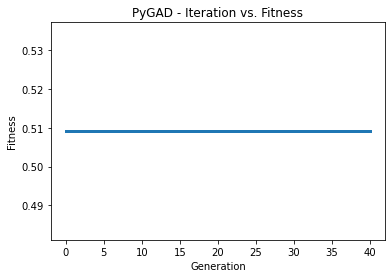

In [9]:
######
##### DEFINING PARAMETRIC SPACES FOR VARIABLES
#####
# Number of blades.
Zmin = 3
Zmax = 7
# Solidities.
sigmamin = 0.4
sigmamax = 0.7
# sigmamax = 0.6
# Hub-to-tip ratio.
hub_to_tip_min = 0.4
hub_to_tip_max = 0.75
# hub_to_tip_max = 0.55
#####
##### DEFINING CONSTANT ARGUMENTS
#####
N = 50
omega = 2100
# rcas = 0.5
rcas = 0.4
airfoils = ["NACA0015", "NACA0018", "NACA0021"]
polars = polars
cpobjs = [933.78, 1089.41, 1089.41, 1011.59, 1011.59, 1011.59, 933.78, 933.78, 933.78, 855.96]
# cpobjs = [622.52, 726.2733333333334, 726.2733333333334, 674.3933333333333, 674.3933333333333, 674.3933333333333, 622.52, 622.52, 622.52, 570.64]
devobjs = [2170.82, 2851.59, 2931.97, 2781.80, 2542.296783, 4518.520988, 4087.436172, 3806.379812, 5845.986619, 6745.134759]
weights = [0.1085, 0.1160, 0.1188, 0.0910, 0.0824, 0.1486, 0.0882, 0.0867, 0.0945, 0.0652]
Nmin = 1000
Nmax = 3200
constargs = {"N": N,
             "omega": omega,
             "rcas": rcas,
             "airfoils": airfoils,
             "polars": polars,
             "cpobjs": cpobjs,
             "devobjs": devobjs,
             "weights": weights,
             "Nmin": Nmin,
             "Nmax": Nmax,
             "Mode": "mono"}
# Best list solution.
best_sols = list()

root_name = "3T_160/Mono_fit_IDOM_r04_3T"

pars_to_write = ["Z", "sigma_hub", "sigma_tip", "hub_to_tip_ratio", "fitness", "K (psi/phi)"]

# Loop for GA trials.
for i in range(1):
    
    filename = root_name + "_" + str(i + 1)

    print('\033[1m' + 'GA trial: ' + str(i + 1) + '\033[0m')
    
    ga_instance = pygad.GA(num_generations=40,
                           num_parents_mating=4,
                           sol_per_pop=160,
                           num_genes=4,
                           fitness_func=turbine_classes.fitness_func,
                           gene_space=[[3, 5, 7],                                               # Blade-number gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Hub solidity gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Tip solidity gene.
                                       list(np.linspace(hub_to_tip_min, hub_to_tip_max,8))],    # Hub-to-tip-ratio gene.
                           on_start=turbine_classes.on_start,
                           on_fitness=turbine_classes.on_fitness,
                           on_generation=turbine_classes.on_generation,
                           on_stop=turbine_classes.on_stop)
    
    #####
    ##### RUNNING GA
    #####
    ga_instance.run(constargs, multiproc=True, num_proc=40, writepops=True, rootfilename=filename, pars_to_write=pars_to_write)
    best_sols.append(ga_instance.best_solution(ga_instance.last_generation_fitness)[0])
    ga_instance.plot_result()

GA trial: 1


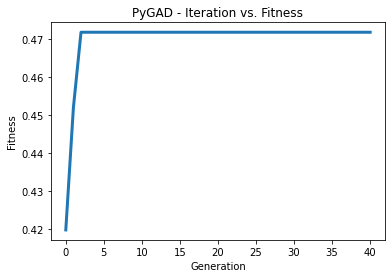

In [10]:
######
##### DEFINING PARAMETRIC SPACES FOR VARIABLES
#####
# Number of blades.
Zmin = 3
Zmax = 7
# Solidities.
sigmamin = 0.4
sigmamax = 0.7
# sigmamax = 0.6
# Hub-to-tip ratio.
hub_to_tip_min = 0.4
hub_to_tip_max = 0.75
# hub_to_tip_max = 0.55
#####
##### DEFINING CONSTANT ARGUMENTS
#####
N = 50
omega = 2100
# rcas = 0.5
rcas = 0.4
airfoils = ["NACA0015", "NACA0018", "NACA0021"]
polars = polars
# cpobjs = [933.78, 1089.41, 1089.41, 1011.59, 1011.59, 1011.59, 933.78, 933.78, 933.78, 855.96]
cpobjs = [622.52, 726.2733333333334, 726.2733333333334, 674.3933333333333, 674.3933333333333, 674.3933333333333, 622.52, 622.52, 622.52, 570.64]
devobjs = [2170.82, 2851.59, 2931.97, 2781.80, 2542.296783, 4518.520988, 4087.436172, 3806.379812, 5845.986619, 6745.134759]
weights = [0.1085, 0.1160, 0.1188, 0.0910, 0.0824, 0.1486, 0.0882, 0.0867, 0.0945, 0.0652]
Nmin = 1000
Nmax = 3200
constargs = {"N": N,
             "omega": omega,
             "rcas": rcas,
             "airfoils": airfoils,
             "polars": polars,
             "cpobjs": cpobjs,
             "devobjs": devobjs,
             "weights": weights,
             "Nmin": Nmin,
             "Nmax": Nmax,
             "Mode": "mono"}
# Best list solution.
best_sols = list()

root_name = "2T_160/Mono_fit_IDOM_r04_2T"

pars_to_write = ["Z", "sigma_hub", "sigma_tip", "hub_to_tip_ratio", "fitness", "K (psi/phi)"]

# Loop for GA trials.
for i in range(1):
    
    filename = root_name + "_" + str(i + 1)

    print('\033[1m' + 'GA trial: ' + str(i + 1) + '\033[0m')
    
    ga_instance = pygad.GA(num_generations=40,
                           num_parents_mating=4,
                           sol_per_pop=160,
                           num_genes=4,
                           fitness_func=turbine_classes.fitness_func,
                           gene_space=[[3, 5, 7],                                               # Blade-number gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Hub solidity gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Tip solidity gene.
                                       list(np.linspace(hub_to_tip_min, hub_to_tip_max,8))],    # Hub-to-tip-ratio gene.                                      
                           on_start=turbine_classes.on_start,
                           on_fitness=turbine_classes.on_fitness,
                           on_generation=turbine_classes.on_generation,
                           on_stop=turbine_classes.on_stop)
    
    #####
    ##### RUNNING GA
    #####
    ga_instance.run(constargs, multiproc=True, num_proc=40, writepops=True, rootfilename=filename, pars_to_write=pars_to_write)
    best_sols.append(ga_instance.best_solution(ga_instance.last_generation_fitness)[0])
    ga_instance.plot_result()

GA trial: 1


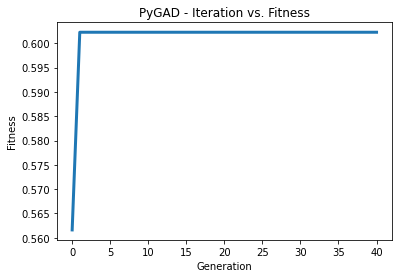

In [11]:
######
##### DEFINING PARAMETRIC SPACES FOR VARIABLES
#####
# Number of blades.
Zmin = 3
Zmax = 7
# Solidities.
sigmamin = 0.4
sigmamax = 0.7
# sigmamax = 0.6
# Hub-to-tip ratio.
hub_to_tip_min = 0.4
hub_to_tip_max = 0.75
# hub_to_tip_max = 0.55
#####
##### DEFINING CONSTANT ARGUMENTS
#####
N = 50
omega = 2100
rcas = 0.5
# rcas = 0.4
airfoils = ["NACA0015", "NACA0018", "NACA0021"]
polars = polars
cpobjs = [933.78, 1089.41, 1089.41, 1011.59, 1011.59, 1011.59, 933.78, 933.78, 933.78, 855.96]
# cpobjs = [622.52, 726.2733333333334, 726.2733333333334, 674.3933333333333, 674.3933333333333, 674.3933333333333, 622.52, 622.52, 622.52, 570.64]
devobjs = [2170.82, 2851.59, 2931.97, 2781.80, 2542.296783, 4518.520988, 4087.436172, 3806.379812, 5845.986619, 6745.134759]
weights = [0.1085, 0.1160, 0.1188, 0.0910, 0.0824, 0.1486, 0.0882, 0.0867, 0.0945, 0.0652]
Nmin = 1000
Nmax = 3200
constargs = {"N": N,
             "omega": omega,
             "rcas": rcas,
             "airfoils": airfoils,
             "polars": polars,
             "cpobjs": cpobjs,
             "devobjs": devobjs,
             "weights": weights,
             "Nmin": Nmin,
             "Nmax": Nmax,
             "Mode": "mono"}
# Best list solution.
best_sols = list()

root_name = "3T_160/Mono_fit_IDOM_r05_3T"

pars_to_write = ["Z", "sigma_hub", "sigma_tip", "hub_to_tip_ratio", "fitness", "K (psi/phi)"]

# Loop for GA trials.
for i in range(1):
    
    filename = root_name + "_" + str(i + 1)

    print('\033[1m' + 'GA trial: ' + str(i + 1) + '\033[0m')
    
    ga_instance = pygad.GA(num_generations=40,
                           num_parents_mating=4,
                           sol_per_pop=160,
                           num_genes=4,
                           fitness_func=turbine_classes.fitness_func,
                           gene_space=[[3, 5, 7],                                               # Blade-number gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Hub solidity gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Tip solidity gene.
                                       list(np.linspace(hub_to_tip_min, hub_to_tip_max,8))],    # Hub-to-tip-ratio gene.                                      
                           on_start=turbine_classes.on_start,
                           on_fitness=turbine_classes.on_fitness,
                           on_generation=turbine_classes.on_generation,
                           on_stop=turbine_classes.on_stop)
    
    #####
    ##### RUNNING GA
    #####
    ga_instance.run(constargs, multiproc=True, num_proc=40, writepops=True, rootfilename=filename, pars_to_write=pars_to_write)
    best_sols.append(ga_instance.best_solution(ga_instance.last_generation_fitness)[0])
    ga_instance.plot_result()

GA trial: 1


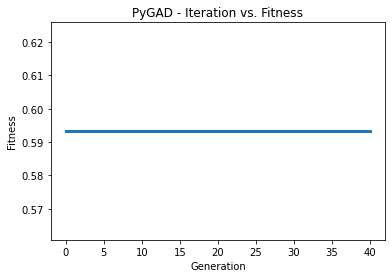

In [12]:
######
##### DEFINING PARAMETRIC SPACES FOR VARIABLES
#####
# Number of blades.
Zmin = 3
Zmax = 7
# Solidities.
sigmamin = 0.4
sigmamax = 0.7
# sigmamax = 0.6
# Hub-to-tip ratio.
hub_to_tip_min = 0.4
hub_to_tip_max = 0.75
# hub_to_tip_max = 0.55
#####
##### DEFINING CONSTANT ARGUMENTS
#####
N = 50
omega = 2100
rcas = 0.5
# rcas = 0.4
airfoils = ["NACA0015", "NACA0018", "NACA0021"]
polars = polars
# cpobjs = [933.78, 1089.41, 1089.41, 1011.59, 1011.59, 1011.59, 933.78, 933.78, 933.78, 855.96]
cpobjs = [622.52, 726.2733333333334, 726.2733333333334, 674.3933333333333, 674.3933333333333, 674.3933333333333, 622.52, 622.52, 622.52, 570.64]
devobjs = [2170.82, 2851.59, 2931.97, 2781.80, 2542.296783, 4518.520988, 4087.436172, 3806.379812, 5845.986619, 6745.134759]
weights = [0.1085, 0.1160, 0.1188, 0.0910, 0.0824, 0.1486, 0.0882, 0.0867, 0.0945, 0.0652]
Nmin = 1000
Nmax = 3200
constargs = {"N": N,
             "omega": omega,
             "rcas": rcas,
             "airfoils": airfoils,
             "polars": polars,
             "cpobjs": cpobjs,
             "devobjs": devobjs,
             "weights": weights,
             "Nmin": Nmin,
             "Nmax": Nmax,
             "Mode": "mono"}
# Best list solution.
best_sols = list()

root_name = "2T_160/Mono_fit_IDOM_r05_2T"

pars_to_write = ["Z", "sigma_hub", "sigma_tip", "hub_to_tip_ratio", "fitness", "K (psi/phi)"]

# Loop for GA trials.
for i in range(1):
    
    filename = root_name + "_" + str(i + 1)

    print('\033[1m' + 'GA trial: ' + str(i + 1) + '\033[0m')
    
    ga_instance = pygad.GA(num_generations=40,
                           num_parents_mating=4,
                           sol_per_pop=160,
                           num_genes=4,
                           fitness_func=turbine_classes.fitness_func,
                           gene_space=[[3, 5, 7],                                               # Blade-number gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Hub solidity gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Tip solidity gene.
                                       list(np.linspace(hub_to_tip_min, hub_to_tip_max,8))],    # Hub-to-tip-ratio gene.                                      
                           on_start=turbine_classes.on_start,
                           on_fitness=turbine_classes.on_fitness,
                           on_generation=turbine_classes.on_generation,
                           on_stop=turbine_classes.on_stop)
    
    #####
    ##### RUNNING GA
    #####
    ga_instance.run(constargs, multiproc=True, num_proc=40, writepops=True, rootfilename=filename, pars_to_write=pars_to_write)
    best_sols.append(ga_instance.best_solution(ga_instance.last_generation_fitness)[0])
    ga_instance.plot_result()

## GA APPLIED TO COUNTER CONFIGURATION

GA trial: 1


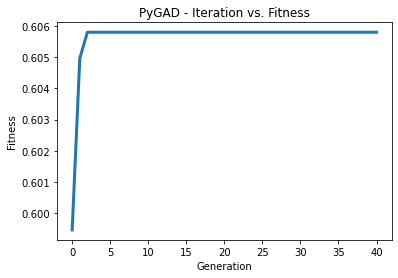

In [13]:
######
##### DEFINING PARAMETRIC SPACES FOR VARIABLES
#####
# Number of blades.
Zmin = 3
Zmax = 7
# Solidities.
sigmamin = 0.4
# sigmamax = 0.6
sigmamax = 0.7
# Hub-to-tip ratio.
hub_to_tip_min = 0.4
# hub_to_tip_max = 0.55
hub_to_tip_max = 0.75
# Tip-percentage.
tip_percent_min = 0.5
tip_percent_max = 3
#####
##### DEFINING CONSTANT ARGUMENTS
#####
N = 50
omega = 2100
rcas = 0.5
# rcas = 0.4
airfoils = ["NACA0015", "NACA0018", "NACA0021"]
polars = polars
# cpobjs = [933.78, 1089.41, 1089.41, 1011.59, 1011.59, 1011.59, 933.78, 933.78, 933.78, 855.96]
cpobjs = [622.52, 726.2733333333334, 726.2733333333334, 674.3933333333333, 674.3933333333333, 674.3933333333333, 622.52, 622.52, 622.52, 570.64]
devobjs = [2170.82, 2851.59, 2931.97, 2781.80, 2542.296783, 4518.520988, 4087.436172, 3806.379812, 5845.986619, 6745.134759]
weights = [0.1085, 0.1160, 0.1188, 0.0910, 0.0824, 0.1486, 0.0882, 0.0867, 0.0945, 0.0652]
Nmin = 1000
Nmax = 3200
constargs = {"N": N,
             "omega": omega,
             "rcas": rcas,
             "airfoils": airfoils,
             "polars": polars,
             "cpobjs": cpobjs,
             "devobjs": devobjs,
             "weights": weights,
             "Nmin": Nmin,
             "Nmax": Nmax,
             "Mode": "counter"}
# Best list solution.
best_sols = list()

root_name = "2T_160/Counter_fit_IDOM_r05_2T"

pars_to_write = ["Z", "sigma_hub", "sigma_tip", "hub_to_tip_ratio", "fitness", "K (psi/phi)"]

# Loop for GA trials.
for i in range(1):
    
    filename = root_name + "_" + str(i + 1)

    print('\033[1m' + 'GA trial: ' + str(i + 1) + '\033[0m')
    
    ga_instance = pygad.GA(num_generations=40,
                           num_parents_mating=4,
                           sol_per_pop=160,
                           num_genes=4,
                           fitness_func=turbine_classes.fitness_func,
                           gene_space=[[3, 5, 7],                                               # Blade-number gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Hub solidity gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Tip solidity gene.
                                       list(np.linspace(hub_to_tip_min, hub_to_tip_max,8))],    # Hub-to-tip-ratio gene.                                      
                           on_start=turbine_classes.on_start,
                           on_fitness=turbine_classes.on_fitness,
                           on_generation=turbine_classes.on_generation,
                           on_stop=turbine_classes.on_stop)
    
    #####
    ##### RUNNING GA
    #####
    ga_instance.run(constargs, multiproc=True, num_proc=40, writepops=True, rootfilename=filename, pars_to_write=pars_to_write)
    best_sols.append(ga_instance.best_solution(ga_instance.last_generation_fitness)[0])
    ga_instance.plot_result()

In [ ]:
######
##### DEFINING PARAMETRIC SPACES FOR VARIABLES
#####
# Number of blades.
Zmin = 3
Zmax = 7
# Solidities.
sigmamin = 0.4
# sigmamax = 0.6
sigmamax = 0.7
# Hub-to-tip ratio.
hub_to_tip_min = 0.4
# hub_to_tip_max = 0.55
hub_to_tip_max = 0.75
# Tip-percentage.
tip_percent_min = 0.5
tip_percent_max = 3
#####
##### DEFINING CONSTANT ARGUMENTS
#####
N = 50
omega = 2100
rcas = 0.5
# rcas = 0.4
airfoils = ["NACA0015", "NACA0018", "NACA0021"]
polars = polars
cpobjs = [933.78, 1089.41, 1089.41, 1011.59, 1011.59, 1011.59, 933.78, 933.78, 933.78, 855.96]
# cpobjs = [622.52, 726.2733333333334, 726.2733333333334, 674.3933333333333, 674.3933333333333, 674.3933333333333, 622.52, 622.52, 622.52, 570.64]
devobjs = [2170.82, 2851.59, 2931.97, 2781.80, 2542.296783, 4518.520988, 4087.436172, 3806.379812, 5845.986619, 6745.134759]
weights = [0.1085, 0.1160, 0.1188, 0.0910, 0.0824, 0.1486, 0.0882, 0.0867, 0.0945, 0.0652]
Nmin = 1000
Nmax = 3200
constargs = {"N": N,
             "omega": omega,
             "rcas": rcas,
             "airfoils": airfoils,
             "polars": polars,
             "cpobjs": cpobjs,
             "devobjs": devobjs,
             "weights": weights,
             "Nmin": Nmin,
             "Nmax": Nmax,
             "Mode": "counter"}
# Best list solution.
best_sols = list()

root_name = "3T_160/Counter_fit_IDOM_r05_3T"

pars_to_write = ["Z", "sigma_hub", "sigma_tip", "hub_to_tip_ratio", "fitness", "K (psi/phi)"]

# Loop for GA trials.
for i in range(1):
    
    filename = root_name + "_" + str(i + 1)

    print('\033[1m' + 'GA trial: ' + str(i + 1) + '\033[0m')
    
    ga_instance = pygad.GA(num_generations=40,
                           num_parents_mating=4,
                           sol_per_pop=160,
                           num_genes=4,
                           fitness_func=turbine_classes.fitness_func,
                           gene_space=[[3, 5, 7],                                               # Blade-number gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Hub solidity gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Tip solidity gene.
                                       list(np.linspace(hub_to_tip_min, hub_to_tip_max,8))],    # Hub-to-tip-ratio gene.                                      
                           on_start=turbine_classes.on_start,
                           on_fitness=turbine_classes.on_fitness,
                           on_generation=turbine_classes.on_generation,
                           on_stop=turbine_classes.on_stop)
    
    #####
    ##### RUNNING GA
    #####
    ga_instance.run(constargs, multiproc=True, num_proc=40, writepops=True, rootfilename=filename, pars_to_write=pars_to_write)
    best_sols.append(ga_instance.best_solution(ga_instance.last_generation_fitness)[0])
    ga_instance.plot_result()

GA trial: 1


In [ ]:
######
##### DEFINING PARAMETRIC SPACES FOR VARIABLES
#####
# Number of blades.
Zmin = 3
Zmax = 7
# Solidities.
sigmamin = 0.4
# sigmamax = 0.6
sigmamax = 0.7
# Hub-to-tip ratio.
hub_to_tip_min = 0.4
# hub_to_tip_max = 0.55
hub_to_tip_max = 0.75
# Tip-percentage.
tip_percent_min = 0.5
tip_percent_max = 3
#####
##### DEFINING CONSTANT ARGUMENTS
#####
N = 50
omega = 2100
# rcas = 0.5
rcas = 0.4
airfoils = ["NACA0015", "NACA0018", "NACA0021"]
polars = polars
# cpobjs = [933.78, 1089.41, 1089.41, 1011.59, 1011.59, 1011.59, 933.78, 933.78, 933.78, 855.96]
cpobjs = [622.52, 726.2733333333334, 726.2733333333334, 674.3933333333333, 674.3933333333333, 674.3933333333333, 622.52, 622.52, 622.52, 570.64]
devobjs = [2170.82, 2851.59, 2931.97, 2781.80, 2542.296783, 4518.520988, 4087.436172, 3806.379812, 5845.986619, 6745.134759]
weights = [0.1085, 0.1160, 0.1188, 0.0910, 0.0824, 0.1486, 0.0882, 0.0867, 0.0945, 0.0652]
Nmin = 1000
Nmax = 3200
constargs = {"N": N,
             "omega": omega,
             "rcas": rcas,
             "airfoils": airfoils,
             "polars": polars,
             "cpobjs": cpobjs,
             "devobjs": devobjs,
             "weights": weights,
             "Nmin": Nmin,
             "Nmax": Nmax,
             "Mode": "counter"}
# Best list solution.
best_sols = list()

root_name = "2T_160/Counter_fit_IDOM_r04_2T"

pars_to_write = ["Z", "sigma_hub", "sigma_tip", "hub_to_tip_ratio", "fitness", "K (psi/phi)"]

# Loop for GA trials.
for i in range(1):
    
    filename = root_name + "_" + str(i + 1)

    print('\033[1m' + 'GA trial: ' + str(i + 1) + '\033[0m')
    
    ga_instance = pygad.GA(num_generations=40,
                           num_parents_mating=4,
                           sol_per_pop=160,
                           num_genes=4,
                           fitness_func=turbine_classes.fitness_func,
                           gene_space=[[3, 5, 7],                                               # Blade-number gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Hub solidity gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Tip solidity gene.
                                       list(np.linspace(hub_to_tip_min, hub_to_tip_max,8))],    # Hub-to-tip-ratio gene.                                      
                           on_start=turbine_classes.on_start,
                           on_fitness=turbine_classes.on_fitness,
                           on_generation=turbine_classes.on_generation,
                           on_stop=turbine_classes.on_stop)
    
    #####
    ##### RUNNING GA
    #####
    ga_instance.run(constargs, multiproc=True, num_proc=40, writepops=True, rootfilename=filename, pars_to_write=pars_to_write)
    best_sols.append(ga_instance.best_solution(ga_instance.last_generation_fitness)[0])
    ga_instance.plot_result()

In [ ]:
######
##### DEFINING PARAMETRIC SPACES FOR VARIABLES
#####
# Number of blades.
Zmin = 3
Zmax = 7
# Solidities.
sigmamin = 0.4
# sigmamax = 0.6
sigmamax = 0.7
# Hub-to-tip ratio.
hub_to_tip_min = 0.4
# hub_to_tip_max = 0.55
hub_to_tip_max = 0.75
# Tip-percentage.
tip_percent_min = 0.5
tip_percent_max = 3
#####
##### DEFINING CONSTANT ARGUMENTS
#####
N = 50
omega = 2100
# rcas = 0.5
rcas = 0.4
airfoils = ["NACA0015", "NACA0018", "NACA0021"]
polars = polars
cpobjs = [933.78, 1089.41, 1089.41, 1011.59, 1011.59, 1011.59, 933.78, 933.78, 933.78, 855.96]
# cpobjs = [622.52, 726.2733333333334, 726.2733333333334, 674.3933333333333, 674.3933333333333, 674.3933333333333, 622.52, 622.52, 622.52, 570.64]
devobjs = [2170.82, 2851.59, 2931.97, 2781.80, 2542.296783, 4518.520988, 4087.436172, 3806.379812, 5845.986619, 6745.134759]
weights = [0.1085, 0.1160, 0.1188, 0.0910, 0.0824, 0.1486, 0.0882, 0.0867, 0.0945, 0.0652]
Nmin = 1000
Nmax = 3200
constargs = {"N": N,
             "omega": omega,
             "rcas": rcas,
             "airfoils": airfoils,
             "polars": polars,
             "cpobjs": cpobjs,
             "devobjs": devobjs,
             "weights": weights,
             "Nmin": Nmin,
             "Nmax": Nmax,
             "Mode": "counter"}
# Best list solution.
best_sols = list()

root_name = "3T_160/Counter_fit_IDOM_r04_3T"

pars_to_write = ["Z", "sigma_hub", "sigma_tip", "hub_to_tip_ratio", "fitness", "K (psi/phi)"]

# Loop for GA trials.
for i in range(1):
    
    filename = root_name + "_" + str(i + 1)

    print('\033[1m' + 'GA trial: ' + str(i + 1) + '\033[0m')
    
    ga_instance = pygad.GA(num_generations=40,
                           num_parents_mating=4,
                           sol_per_pop=160,
                           num_genes=4,
                           fitness_func=turbine_classes.fitness_func,
                           gene_space=[[3, 5, 7],                                               # Blade-number gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Hub solidity gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Tip solidity gene.
                                       list(np.linspace(hub_to_tip_min, hub_to_tip_max,8))],    # Hub-to-tip-ratio gene.                                      
                           on_start=turbine_classes.on_start,
                           on_fitness=turbine_classes.on_fitness,
                           on_generation=turbine_classes.on_generation,
                           on_stop=turbine_classes.on_stop)
    
    #####
    ##### RUNNING GA
    #####
    ga_instance.run(constargs, multiproc=True, num_proc=40, writepops=True, rootfilename=filename, pars_to_write=pars_to_write)
    best_sols.append(ga_instance.best_solution(ga_instance.last_generation_fitness)[0])
    ga_instance.plot_result()

## GA APPLIED TO PITCHOPT CONFIGURATION

### D=1 [m], #turb=2, cp=opts

In [ ]:
######
##### DEFINING PARAMETRIC SPACES FOR VARIABLES
#####
# Number of blades.
Zmin = 3
Zmax = 7
# Solidities.
sigmamin = 0.4
# sigmamax = 0.6
sigmamax = 0.7
# Hub-to-tip ratio.
hub_to_tip_min = 0.4
# hub_to_tip_max = 0.55
hub_to_tip_max = 0.75
# Tip-percentage.
tip_percent_min = 0.5
tip_percent_max = 3
#####
##### DEFINING CONSTANT ARGUMENTS
#####
N = 50
omega = 2100
rcas = 0.5
# rcas = 0.4
polars = polars
# cpobjsopt3T = [933.78, 1089.41, 1089.41, 1011.59, 1011.59, 1011.59, 933.78, 933.78, 933.78, 855.96]
cpobjsopt2T = [622.52, 726.2733333333334, 726.2733333333334, 674.3933333333333, 674.3933333333333, 674.3933333333333, 622.52, 622.52, 622.52, 570.64]
devobjsopt = [2170.82, 2851.59, 2931.97, 2781.80, 2542.296783, 4518.520988, 4087.436172, 3806.379812, 5845.986619, 6745.134759]
# cpobjsmin3T = [700.33, 778.15, 778.15, 700.33, 700.33, 778.15, 700.33, 622.52, 700.33, 622.52]
# cpobjsmin2T = [466.8866666666667, 518.7666666666667, 518.7666666666667, 466.8866666666667, 466.8866666666667, 518.7666666666667, 466.8866666666667, 415.0133333333333, 466.8866666666667, 415.0133333333333]
# devobjsmin = [1860.52, 2381.93, 2446.55, 2274.09, 2077.07, 3912.52, 3480.02, 3038.81, 4974.63, 5626.39]
weightsopt = [0.1085, 0.1160, 0.1188, 0.0910, 0.0824, 0.1486, 0.0882, 0.0867, 0.0945, 0.0652]
# weightsmin = [0.1097, 0.1160, 0.1196, 0.0906, 0.082, 0.1495, 0.0879, 0.0855, 0.0942, 0.0644]
Nmin = 1000
Nmax = 3200
constargs = {"N": N,
             "omega": omega,
             "rcas": rcas,
             "polars": polars,
             "cpobjs": cpobjsopt2T,
             "devobjs": devobjsopt,
             "weights": weightsopt,
             "Nmin": Nmin,
             "Nmax": Nmax,
             "Mode": "pitchopt"}
# Best list solution.
best_sols = list()

root_name = "2T_160/Pitchopt_fit_IDOM_r05_opts_2T"

pars_to_write = ["Z", "sigma_hub", "sigma_tip", "hub_to_tip_ratio", "fitness", "K (psi/phi)"]

# Keeping awake.
set_keepawake(keep_screen_awake=False)

# Loop for GA trials.
for i in range(1):
    
    filename = root_name + "_" + str(i + 1)

    print('\033[1m' + 'GA trial: ' + str(i + 1) + '\033[0m')
    
    ga_instance = pygad.GA(num_generations=20,
                           num_parents_mating=4,
                           sol_per_pop=160,
                           num_genes=4,
                           fitness_func=turbine_classes.fitness_func,
                           mutation_num_genes=4,
                           gene_space=[[3, 5, 7],                                               # Blade-number gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Hub solidity gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Tip solidity gene.
                                       list(np.linspace(hub_to_tip_min, hub_to_tip_max,8))],    # Hub-to-tip-ratio gene.                                      
                           on_start=turbine_classes.on_start,
                           on_fitness=turbine_classes.on_fitness,
                           on_generation=turbine_classes.on_generation,
                           on_stop=turbine_classes.on_stop)
    
    #####
    ##### RUNNING GA
    #####
    ga_instance.run(constargs, multiproc=True, num_proc=40, writepops=True, rootfilename=filename, pars_to_write=pars_to_write)
    best_sols.append(ga_instance.best_solution(ga_instance.last_generation_fitness)[0])
    ga_instance.plot_result()
    
# Unkeeping awake.
unset_keepawake()

### D=0.8 [m], #turb=2, cp=opt

In [ ]:
######
##### DEFINING PARAMETRIC SPACES FOR VARIABLES
#####
# Number of blades.
Zmin = 3
Zmax = 7
# Solidities.
sigmamin = 0.4
# sigmamax = 0.6
sigmamax = 0.7
# Hub-to-tip ratio.
hub_to_tip_min = 0.4
# hub_to_tip_max = 0.55
hub_to_tip_max = 0.75
# Tip-percentage.
tip_percent_min = 0.5
tip_percent_max = 3
#####
##### DEFINING CONSTANT ARGUMENTS
#####
N = 50
omega = 2100
# rcas = 0.5
rcas = 0.4
polars = polars
# cpobjsopt3T = [933.78, 1089.41, 1089.41, 1011.59, 1011.59, 1011.59, 933.78, 933.78, 933.78, 855.96]
cpobjsopt2T = [622.52, 726.2733333333334, 726.2733333333334, 674.3933333333333, 674.3933333333333, 674.3933333333333, 622.52, 622.52, 622.52, 570.64]
devobjsopt = [2170.82, 2851.59, 2931.97, 2781.80, 2542.296783, 4518.520988, 4087.436172, 3806.379812, 5845.986619, 6745.134759]
# cpobjsmin3T = [700.33, 778.15, 778.15, 700.33, 700.33, 778.15, 700.33, 622.52, 700.33, 622.52]
# cpobjsmin2T = [466.8866666666667, 518.7666666666667, 518.7666666666667, 466.8866666666667, 466.8866666666667, 518.7666666666667, 466.8866666666667, 415.0133333333333, 466.8866666666667, 415.0133333333333]
# devobjsmin = [1860.52, 2381.93, 2446.55, 2274.09, 2077.07, 3912.52, 3480.02, 3038.81, 4974.63, 5626.39]
weightsopt = [0.1085, 0.1160, 0.1188, 0.0910, 0.0824, 0.1486, 0.0882, 0.0867, 0.0945, 0.0652]
# weightsmin = [0.1097, 0.1160, 0.1196, 0.0906, 0.082, 0.1495, 0.0879, 0.0855, 0.0942, 0.0644]
Nmin = 1000
Nmax = 3200
constargs = {"N": N,
             "omega": omega,
             "rcas": rcas,
             "polars": polars,
             "cpobjs": cpobjsopt2T,
             "devobjs": devobjsopt,
             "weights": weightsopt,
             "Nmin": Nmin,
             "Nmax": Nmax,
             "Mode": "pitchopt"}
# Best list solution.
best_sols = list()

root_name = "2T_160/Pitchopt_fit_IDOM_r04_opts_2T"

pars_to_write = ["Z", "sigma_hub", "sigma_tip", "hub_to_tip_ratio", "fitness", "K (psi/phi)"]

# Keeping awake.
set_keepawake(keep_screen_awake=False)

# Loop for GA trials.
for i in range(1):
    
    filename = root_name + "_" + str(i + 1)

    print('\033[1m' + 'GA trial: ' + str(i + 1) + '\033[0m')
    
    ga_instance = pygad.GA(num_generations=20,
                           num_parents_mating=4,
                           sol_per_pop=160,
                           num_genes=4,
                           fitness_func=turbine_classes.fitness_func,
                           mutation_num_genes=4,
                           gene_space=[[3, 5, 7],                                               # Blade-number gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Hub solidity gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Tip solidity gene.
                                       list(np.linspace(hub_to_tip_min, hub_to_tip_max,8))],    # Hub-to-tip-ratio gene.                                      
                           on_start=turbine_classes.on_start,
                           on_fitness=turbine_classes.on_fitness,
                           on_generation=turbine_classes.on_generation,
                           on_stop=turbine_classes.on_stop)
    
    #####
    ##### RUNNING GA
    #####
    ga_instance.run(constargs, multiproc=True, num_proc=40, writepops=True, rootfilename=filename, pars_to_write=pars_to_write)
    best_sols.append(ga_instance.best_solution(ga_instance.last_generation_fitness)[0])
    ga_instance.plot_result()
    
# Unkeeping awake.
unset_keepawake()

### D=1 [m], #turb=2, cp=min

In [ ]:
######
##### DEFINING PARAMETRIC SPACES FOR VARIABLES
#####
# Number of blades.
Zmin = 3
Zmax = 7
# Solidities.
sigmamin = 0.4
# sigmamax = 0.6
sigmamax = 0.7
# Hub-to-tip ratio.
hub_to_tip_min = 0.4
# hub_to_tip_max = 0.55
hub_to_tip_max = 0.75
# Tip-percentage.
tip_percent_min = 0.5
tip_percent_max = 3
#####
##### DEFINING CONSTANT ARGUMENTS
#####
N = 50
omega = 2100
rcas = 0.5
# rcas = 0.4
polars = polars
# cpobjsopt3T = [933.78, 1089.41, 1089.41, 1011.59, 1011.59, 1011.59, 933.78, 933.78, 933.78, 855.96]
# cpobjsopt2T = [622.52, 726.2733333333334, 726.2733333333334, 674.3933333333333, 674.3933333333333, 674.3933333333333, 622.52, 622.52, 622.52, 570.64]
# devobjsopt = [2170.82, 2851.59, 2931.97, 2781.80, 2542.296783, 4518.520988, 4087.436172, 3806.379812, 5845.986619, 6745.134759]
# cpobjsmin3T = [700.33, 778.15, 778.15, 700.33, 700.33, 778.15, 700.33, 622.52, 700.33, 622.52]
cpobjsmin2T = [466.8866666666667, 518.7666666666667, 518.7666666666667, 466.8866666666667, 466.8866666666667, 518.7666666666667, 466.8866666666667, 415.0133333333333, 466.8866666666667, 415.0133333333333]
devobjsmin = [1860.52, 2381.93, 2446.55, 2274.09, 2077.07, 3912.52, 3480.02, 3038.81, 4974.63, 5626.39]
# weightsopt = [0.1085, 0.1160, 0.1188, 0.0910, 0.0824, 0.1486, 0.0882, 0.0867, 0.0945, 0.0652]
weightsmin = [0.1097, 0.1160, 0.1196, 0.0906, 0.082, 0.1495, 0.0879, 0.0855, 0.0942, 0.0644]
Nmin = 1000
Nmax = 3200
constargs = {"N": N,
             "omega": omega,
             "rcas": rcas,
             "polars": polars,
             "cpobjs": cpobjsmin2T,
             "devobjs": devobjsmin,
             "weights": weightsmin,
             "Nmin": Nmin,
             "Nmax": Nmax,
             "Mode": "pitchopt"}
# Best list solution.
best_sols = list()

root_name = "2T_160/Pitchopt_fit_IDOM_r05_mins_2T"

pars_to_write = ["Z", "sigma_hub", "sigma_tip", "hub_to_tip_ratio", "fitness", "K (psi/phi)"]

# Keeping awake.
set_keepawake(keep_screen_awake=False)

# Loop for GA trials.
for i in range(1):
    
    filename = root_name + "_" + str(i + 1)

    print('\033[1m' + 'GA trial: ' + str(i + 1) + '\033[0m')
    
    ga_instance = pygad.GA(num_generations=20,
                           num_parents_mating=4,
                           sol_per_pop=160,
                           num_genes=4,
                           fitness_func=turbine_classes.fitness_func,
                           mutation_num_genes=4,
                           gene_space=[[3, 5, 7],                                               # Blade-number gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Hub solidity gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Tip solidity gene.
                                       list(np.linspace(hub_to_tip_min, hub_to_tip_max,8))],    # Hub-to-tip-ratio gene.                                      
                           on_start=turbine_classes.on_start,
                           on_fitness=turbine_classes.on_fitness,
                           on_generation=turbine_classes.on_generation,
                           on_stop=turbine_classes.on_stop)
    
    #####
    ##### RUNNING GA
    #####
    ga_instance.run(constargs, multiproc=True, num_proc=40, writepops=True, rootfilename=filename, pars_to_write=pars_to_write)
    best_sols.append(ga_instance.best_solution(ga_instance.last_generation_fitness)[0])
    ga_instance.plot_result()
    
# Unkeeping awake.
unset_keepawake()

### D=0.8 [m], #turb=2, cp=min

In [ ]:
######
##### DEFINING PARAMETRIC SPACES FOR VARIABLES
#####
# Number of blades.
Zmin = 3
Zmax = 7
# Solidities.
sigmamin = 0.4
# sigmamax = 0.6
sigmamax = 0.7
# Hub-to-tip ratio.
hub_to_tip_min = 0.4
# hub_to_tip_max = 0.55
hub_to_tip_max = 0.75
# Tip-percentage.
tip_percent_min = 0.5
tip_percent_max = 3
#####
##### DEFINING CONSTANT ARGUMENTS
#####
N = 50
omega = 2100
# rcas = 0.5
rcas = 0.4
polars = polars
# cpobjsopt3T = [933.78, 1089.41, 1089.41, 1011.59, 1011.59, 1011.59, 933.78, 933.78, 933.78, 855.96]
# cpobjsopt2T = [622.52, 726.2733333333334, 726.2733333333334, 674.3933333333333, 674.3933333333333, 674.3933333333333, 622.52, 622.52, 622.52, 570.64]
# devobjsopt = [2170.82, 2851.59, 2931.97, 2781.80, 2542.296783, 4518.520988, 4087.436172, 3806.379812, 5845.986619, 6745.134759]
# cpobjsmin3T = [700.33, 778.15, 778.15, 700.33, 700.33, 778.15, 700.33, 622.52, 700.33, 622.52]
cpobjsmin2T = [466.8866666666667, 518.7666666666667, 518.7666666666667, 466.8866666666667, 466.8866666666667, 518.7666666666667, 466.8866666666667, 415.0133333333333, 466.8866666666667, 415.0133333333333]
devobjsmin = [1860.52, 2381.93, 2446.55, 2274.09, 2077.07, 3912.52, 3480.02, 3038.81, 4974.63, 5626.39]
# weightsopt = [0.1085, 0.1160, 0.1188, 0.0910, 0.0824, 0.1486, 0.0882, 0.0867, 0.0945, 0.0652]
weightsmin = [0.1097, 0.1160, 0.1196, 0.0906, 0.082, 0.1495, 0.0879, 0.0855, 0.0942, 0.0644]
Nmin = 1000
Nmax = 3200
constargs = {"N": N,
             "omega": omega,
             "rcas": rcas,
             "polars": polars,
             "cpobjs": cpobjsmin2T,
             "devobjs": devobjsmin,
             "weights": weightsmin,
             "Nmin": Nmin,
             "Nmax": Nmax,
             "Mode": "pitchopt"}
# Best list solution.
best_sols = list()

root_name = "2T_160/Pitchopt_fit_IDOM_r04_mins_2T"

pars_to_write = ["Z", "sigma_hub", "sigma_tip", "hub_to_tip_ratio", "fitness", "K (psi/phi)"]

# Keeping awake.
set_keepawake(keep_screen_awake=False)

# Loop for GA trials.
for i in range(1):
    
    filename = root_name + "_" + str(i + 1)

    print('\033[1m' + 'GA trial: ' + str(i + 1) + '\033[0m')
    
    ga_instance = pygad.GA(num_generations=20,
                           num_parents_mating=4,
                           sol_per_pop=160,
                           num_genes=4,
                           fitness_func=turbine_classes.fitness_func,
                           mutation_num_genes=4,
                           gene_space=[[3, 5, 7],                                               # Blade-number gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Hub solidity gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Tip solidity gene.
                                       list(np.linspace(hub_to_tip_min, hub_to_tip_max,8))],   # Hub-to-tip-ratio gene.                                      
                           on_start=turbine_classes.on_start,
                           on_fitness=turbine_classes.on_fitness,
                           on_generation=turbine_classes.on_generation,
                           on_stop=turbine_classes.on_stop)
    
    #####
    ##### RUNNING GA
    #####
    ga_instance.run(constargs, multiproc=True, num_proc=40, writepops=True, rootfilename=filename, pars_to_write=pars_to_write)
    best_sols.append(ga_instance.best_solution(ga_instance.last_generation_fitness)[0])
    ga_instance.plot_result()
    
# Unkeeping awake.
unset_keepawake()

### D=1 [m], #turb=3, cp=opts

In [ ]:
######
##### DEFINING PARAMETRIC SPACES FOR VARIABLES
#####
# Number of blades.
Zmin = 3
Zmax = 7
# Solidities.
sigmamin = 0.4
# sigmamax = 0.6
sigmamax = 0.7
# Hub-to-tip ratio.
hub_to_tip_min = 0.4
# hub_to_tip_max = 0.55
hub_to_tip_max = 0.75
# Tip-percentage.
tip_percent_min = 0.5
tip_percent_max = 3
#####
##### DEFINING CONSTANT ARGUMENTS
#####
N = 50
omega = 2100
rcas = 0.5
# rcas = 0.4
polars = polars
cpobjsopt3T = [933.78, 1089.41, 1089.41, 1011.59, 1011.59, 1011.59, 933.78, 933.78, 933.78, 855.96]
# cpobjsopt2T = [622.52, 726.2733333333334, 726.2733333333334, 674.3933333333333, 674.3933333333333, 674.3933333333333, 622.52, 622.52, 622.52, 570.64]
devobjsopt = [2170.82, 2851.59, 2931.97, 2781.80, 2542.296783, 4518.520988, 4087.436172, 3806.379812, 5845.986619, 6745.134759]
# cpobjsmin3T = [700.33, 778.15, 778.15, 700.33, 700.33, 778.15, 700.33, 622.52, 700.33, 622.52]
# cpobjsmin2T = [466.8866666666667, 518.7666666666667, 518.7666666666667, 466.8866666666667, 466.8866666666667, 518.7666666666667, 466.8866666666667, 415.0133333333333, 466.8866666666667, 415.0133333333333]
# devobjsmin = [1860.52, 2381.93, 2446.55, 2274.09, 2077.07, 3912.52, 3480.02, 3038.81, 4974.63, 5626.39]
weightsopt = [0.1085, 0.1160, 0.1188, 0.0910, 0.0824, 0.1486, 0.0882, 0.0867, 0.0945, 0.0652]
# weightsmin = [0.1097, 0.1160, 0.1196, 0.0906, 0.082, 0.1495, 0.0879, 0.0855, 0.0942, 0.0644]
Nmin = 1000
Nmax = 3200
constargs = {"N": N,
             "omega": omega,
             "rcas": rcas,
             "polars": polars,
             "cpobjs": cpobjsopt3T,
             "devobjs": devobjsopt,
             "weights": weightsopt,
             "Nmin": Nmin,
             "Nmax": Nmax,
             "Mode": "pitchopt"}
# Best list solution.
best_sols = list()

root_name = "3T_160/Pitchopt_fit_IDOM_r05_opts_3T"

pars_to_write = ["Z", "sigma_hub", "sigma_tip", "hub_to_tip_ratio", "fitness", "K (psi/phi)"]

# Keeping awake.
set_keepawake(keep_screen_awake=False)

# Loop for GA trials.
for i in range(1):
    
    filename = root_name + "_" + str(i + 1)

    print('\033[1m' + 'GA trial: ' + str(i + 1) + '\033[0m')
    
    ga_instance = pygad.GA(num_generations=20,
                           num_parents_mating=4,
                           sol_per_pop=160,
                           num_genes=4,
                           fitness_func=turbine_classes.fitness_func,
                           mutation_num_genes=4,
                           gene_space=[[3, 5, 7],                                               # Blade-number gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Hub solidity gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Tip solidity gene.
                                       list(np.linspace(hub_to_tip_min, hub_to_tip_max,8))],    # Hub-to-tip-ratio gene.                                      
                           on_start=turbine_classes.on_start,
                           on_fitness=turbine_classes.on_fitness,
                           on_generation=turbine_classes.on_generation,
                           on_stop=turbine_classes.on_stop)
    
    #####
    ##### RUNNING GA
    #####
    ga_instance.run(constargs, multiproc=True, num_proc=40, writepops=True, rootfilename=filename, pars_to_write=pars_to_write)
    best_sols.append(ga_instance.best_solution(ga_instance.last_generation_fitness)[0])
    ga_instance.plot_result()
    
# Unkeeping awake.
unset_keepawake()

### D=0.8 [m], #turb=3, cp=opt

In [ ]:
######
##### DEFINING PARAMETRIC SPACES FOR VARIABLES
#####
# Number of blades.
Zmin = 3
Zmax = 7
# Solidities.
sigmamin = 0.4
# sigmamax = 0.6
sigmamax = 0.7
# Hub-to-tip ratio.
hub_to_tip_min = 0.4
# hub_to_tip_max = 0.55
hub_to_tip_max = 0.75
# Tip-percentage.
tip_percent_min = 0.5
tip_percent_max = 3
#####
##### DEFINING CONSTANT ARGUMENTS
#####
N = 50
omega = 2100
# rcas = 0.5
rcas = 0.4
polars = polars
cpobjsopt3T = [933.78, 1089.41, 1089.41, 1011.59, 1011.59, 1011.59, 933.78, 933.78, 933.78, 855.96]
# cpobjsopt2T = [622.52, 726.2733333333334, 726.2733333333334, 674.3933333333333, 674.3933333333333, 674.3933333333333, 622.52, 622.52, 622.52, 570.64]
devobjsopt = [2170.82, 2851.59, 2931.97, 2781.80, 2542.296783, 4518.520988, 4087.436172, 3806.379812, 5845.986619, 6745.134759]
# cpobjsmin3T = [700.33, 778.15, 778.15, 700.33, 700.33, 778.15, 700.33, 622.52, 700.33, 622.52]
# cpobjsmin2T = [466.8866666666667, 518.7666666666667, 518.7666666666667, 466.8866666666667, 466.8866666666667, 518.7666666666667, 466.8866666666667, 415.0133333333333, 466.8866666666667, 415.0133333333333]
# devobjsmin = [1860.52, 2381.93, 2446.55, 2274.09, 2077.07, 3912.52, 3480.02, 3038.81, 4974.63, 5626.39]
weightsopt = [0.1085, 0.1160, 0.1188, 0.0910, 0.0824, 0.1486, 0.0882, 0.0867, 0.0945, 0.0652]
# weightsmin = [0.1097, 0.1160, 0.1196, 0.0906, 0.082, 0.1495, 0.0879, 0.0855, 0.0942, 0.0644]
Nmin = 1000
Nmax = 3200
constargs = {"N": N,
             "omega": omega,
             "rcas": rcas,
             "polars": polars,
             "cpobjs": cpobjsopt3T,
             "devobjs": devobjsopt,
             "weights": weightsopt,
             "Nmin": Nmin,
             "Nmax": Nmax,
             "Mode": "pitchopt"}
# Best list solution.
best_sols = list()

root_name = "3T_160/Pitchopt_fit_IDOM_r04_opts_3T"

pars_to_write = ["Z", "sigma_hub", "sigma_tip", "hub_to_tip_ratio", "fitness", "K (psi/phi)"]

# Keeping awake.
set_keepawake(keep_screen_awake=False)

# Loop for GA trials.
for i in range(1):
    
    filename = root_name + "_" + str(i + 1)

    print('\033[1m' + 'GA trial: ' + str(i + 1) + '\033[0m')
    
    ga_instance = pygad.GA(num_generations=20,
                           num_parents_mating=4,
                           sol_per_pop=160,
                           num_genes=4,
                           fitness_func=turbine_classes.fitness_func,
                           mutation_num_genes=4,
                           gene_space=[[3, 5, 7],                                               # Blade-number gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Hub solidity gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Tip solidity gene.
                                       list(np.linspace(hub_to_tip_min, hub_to_tip_max,8))],    # Hub-to-tip-ratio gene.                                      
                           on_start=turbine_classes.on_start,
                           on_fitness=turbine_classes.on_fitness,
                           on_generation=turbine_classes.on_generation,
                           on_stop=turbine_classes.on_stop)
    
    #####
    ##### RUNNING GA
    #####
    ga_instance.run(constargs, multiproc=True, num_proc=40, writepops=True, rootfilename=filename, pars_to_write=pars_to_write)
    best_sols.append(ga_instance.best_solution(ga_instance.last_generation_fitness)[0])
    ga_instance.plot_result()
    
# Unkeeping awake.
unset_keepawake()

### D=1 [m], #turb=3, cp=min

In [ ]:
######
##### DEFINING PARAMETRIC SPACES FOR VARIABLES
#####
# Number of blades.
Zmin = 3
Zmax = 7
# Solidities.
sigmamin = 0.4
# sigmamax = 0.6
sigmamax = 0.7
# Hub-to-tip ratio.
hub_to_tip_min = 0.4
# hub_to_tip_max = 0.55
hub_to_tip_max = 0.75
# Tip-percentage.
tip_percent_min = 0.5
tip_percent_max = 3
#####
##### DEFINING CONSTANT ARGUMENTS
#####
N = 50
omega = 2100
rcas = 0.5
# rcas = 0.4
polars = polars
# cpobjsopt3T = [933.78, 1089.41, 1089.41, 1011.59, 1011.59, 1011.59, 933.78, 933.78, 933.78, 855.96]
# cpobjsopt2T = [622.52, 726.2733333333334, 726.2733333333334, 674.3933333333333, 674.3933333333333, 674.3933333333333, 622.52, 622.52, 622.52, 570.64]
# devobjsopt = [2170.82, 2851.59, 2931.97, 2781.80, 2542.296783, 4518.520988, 4087.436172, 3806.379812, 5845.986619, 6745.134759]
cpobjsmin3T = [700.33, 778.15, 778.15, 700.33, 700.33, 778.15, 700.33, 622.52, 700.33, 622.52]
# cpobjsmin2T = [466.8866666666667, 518.7666666666667, 518.7666666666667, 466.8866666666667, 466.8866666666667, 518.7666666666667, 466.8866666666667, 415.0133333333333, 466.8866666666667, 415.0133333333333]
devobjsmin = [1860.52, 2381.93, 2446.55, 2274.09, 2077.07, 3912.52, 3480.02, 3038.81, 4974.63, 5626.39]
# weightsopt = [0.1085, 0.1160, 0.1188, 0.0910, 0.0824, 0.1486, 0.0882, 0.0867, 0.0945, 0.0652]
weightsmin = [0.1097, 0.1160, 0.1196, 0.0906, 0.082, 0.1495, 0.0879, 0.0855, 0.0942, 0.0644]
Nmin = 1000
Nmax = 3200
constargs = {"N": N,
             "omega": omega,
             "rcas": rcas,
             "polars": polars,
             "cpobjs": cpobjsmin3T,
             "devobjs": devobjsmin,
             "weights": weightsmin,
             "Nmin": Nmin,
             "Nmax": Nmax,
             "Mode": "pitchopt"}
# Best list solution.
best_sols = list()

root_name = "3T_160/Pitchopt_fit_IDOM_r05_mins_3T"

pars_to_write = ["Z", "sigma_hub", "sigma_tip", "hub_to_tip_ratio", "fitness", "K (psi/phi)"]

# Keeping awake.
set_keepawake(keep_screen_awake=False)

# Loop for GA trials.
for i in range(1):
    
    filename = root_name + "_" + str(i + 1)

    print('\033[1m' + 'GA trial: ' + str(i + 1) + '\033[0m')
    
    ga_instance = pygad.GA(num_generations=20,
                           num_parents_mating=4,
                           sol_per_pop=160,
                           num_genes=4,
                           fitness_func=turbine_classes.fitness_func,
                           mutation_num_genes=4,
                           gene_space=[[3, 5, 7],                                               # Blade-number gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Hub solidity gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Tip solidity gene.
                                       list(np.linspace(hub_to_tip_min, hub_to_tip_max,8))],    # Hub-to-tip-ratio gene.                                      
                           on_start=turbine_classes.on_start,
                           on_fitness=turbine_classes.on_fitness,
                           on_generation=turbine_classes.on_generation,
                           on_stop=turbine_classes.on_stop)
    
    #####
    ##### RUNNING GA
    #####
    ga_instance.run(constargs, multiproc=True, num_proc=40, writepops=True, rootfilename=filename, pars_to_write=pars_to_write)
    best_sols.append(ga_instance.best_solution(ga_instance.last_generation_fitness)[0])
    ga_instance.plot_result()
    
# Unkeeping awake.
unset_keepawake()

### D=0.8 [m], #turb=3, cp=min

In [ ]:
######
##### DEFINING PARAMETRIC SPACES FOR VARIABLES
#####
# Number of blades.
Zmin = 3
Zmax = 7
# Solidities.
sigmamin = 0.4
# sigmamax = 0.6
sigmamax = 0.7
# Hub-to-tip ratio.
hub_to_tip_min = 0.4
# hub_to_tip_max = 0.55
hub_to_tip_max = 0.75
# Tip-percentage.
tip_percent_min = 0.5
tip_percent_max = 3
#####
##### DEFINING CONSTANT ARGUMENTS
#####
N = 50
omega = 2100
# rcas = 0.5
rcas = 0.4
polars = polars
# cpobjsopt3T = [933.78, 1089.41, 1089.41, 1011.59, 1011.59, 1011.59, 933.78, 933.78, 933.78, 855.96]
# cpobjsopt2T = [622.52, 726.2733333333334, 726.2733333333334, 674.3933333333333, 674.3933333333333, 674.3933333333333, 622.52, 622.52, 622.52, 570.64]
# devobjsopt = [2170.82, 2851.59, 2931.97, 2781.80, 2542.296783, 4518.520988, 4087.436172, 3806.379812, 5845.986619, 6745.134759]
cpobjsmin3T = [700.33, 778.15, 778.15, 700.33, 700.33, 778.15, 700.33, 622.52, 700.33, 622.52]
# cpobjsmin2T = [466.8866666666667, 518.7666666666667, 518.7666666666667, 466.8866666666667, 466.8866666666667, 518.7666666666667, 466.8866666666667, 415.0133333333333, 466.8866666666667, 415.0133333333333]
devobjsmin = [1860.52, 2381.93, 2446.55, 2274.09, 2077.07, 3912.52, 3480.02, 3038.81, 4974.63, 5626.39]
# weightsopt = [0.1085, 0.1160, 0.1188, 0.0910, 0.0824, 0.1486, 0.0882, 0.0867, 0.0945, 0.0652]
weightsmin = [0.1097, 0.1160, 0.1196, 0.0906, 0.082, 0.1495, 0.0879, 0.0855, 0.0942, 0.0644]
Nmin = 1000
Nmax = 3200
constargs = {"N": N,
             "omega": omega,
             "rcas": rcas,
             "polars": polars,
             "cpobjs": cpobjsmin3T,
             "devobjs": devobjsmin,
             "weights": weightsmin,
             "Nmin": Nmin,
             "Nmax": Nmax,
             "Mode": "pitchopt"}
# Best list solution.
best_sols = list()

root_name = "3T_160/Pitchopt_fit_IDOM_r04_mins_3T"

pars_to_write = ["Z", "sigma_hub", "sigma_tip", "hub_to_tip_ratio", "fitness", "K (psi/phi)"]

# Keeping awake.
set_keepawake(keep_screen_awake=False)

# Loop for GA trials.
for i in range(1):
    
    filename = root_name + "_" + str(i + 1)

    print('\033[1m' + 'GA trial: ' + str(i + 1) + '\033[0m')
    
    ga_instance = pygad.GA(num_generations=20,
                           num_parents_mating=4,
                           sol_per_pop=160,
                           num_genes=4,
                           fitness_func=turbine_classes.fitness_func,
                           mutation_num_genes=4,
                           gene_space=[[3, 5, 7],                                               # Blade-number gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Hub solidity gene.
                                       list(np.linspace(sigmamin, sigmamax,8)),                 # Tip solidity gene.
                                       list(np.linspace(hub_to_tip_min, hub_to_tip_max,8))],   # Hub-to-tip-ratio gene.                                      
                           on_start=turbine_classes.on_start,
                           on_fitness=turbine_classes.on_fitness,
                           on_generation=turbine_classes.on_generation,
                           on_stop=turbine_classes.on_stop)
    
    #####
    ##### RUNNING GA
    #####
    ga_instance.run(constargs, multiproc=True, num_proc=40, writepops=True, rootfilename=filename, pars_to_write=pars_to_write)
    best_sols.append(ga_instance.best_solution(ga_instance.last_generation_fitness)[0])
    ga_instance.plot_result()
    
# Unkeeping awake.
unset_keepawake()